# Credit Loan Case Study using Python 

# Introduction
This assignment aims to give you an idea of applying EDA in a real business
scenario. In this assignment, apart from applying the techniques that you have
learnt in the EDA module, you will also develop a basic understanding of risk
analytics in banking and financial services and understand how data is used to
minimise the risk of losing money while lending to customers.

# Business Understanding
The loan providing companies find it hard to give loans to the people due to
their insufficient or non-existent credit history. Because of that, some
consumers use it to their advantage by becoming a defaulter. Suppose you
work for a consumer finance company which specialises in lending various
types of loans to urban customers. You have to use EDA to analyse the
patterns present in the data. This will ensure that the applicants capable of
repaying the loan are not rejected.


When the company receives a loan application, the company has to decide for
loan approval based on the applicant’s profile. Two types of risks are
associated with the bank’s decision

# Business Objectives
This case study aims to identify patterns which indicate if a client has
difficulty paying their instalments which may be used for taking actions such
as denying the loan, reducing the amount of loan, lending (to risky applicants)
at a higher interest rate, etc. This will ensure that the consumers capable of
repaying the loan are not rejected. Identification of such applicants using
EDA is the aim of this case study.
In other words, the company wants to understand the driving factors (or
driver variables) behind loan default, i.e. the variables which are strong
indicators of default. The company can utilise this knowledge for its portfolio
and risk assessment.


To develop your understanding of the domain, you are advised to
independently research a little about risk analytics - understanding the types
of variables and their significance should be enough.

# Importing all Liabraries 

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# To make a readable all columns in datasets

In [65]:
pd.set_option('display.max_columns', None)


# Files Path

In [66]:
path = r'E:\CSV_Files\Project\Credit EDA Case Study'

# Read the Datasets

In [67]:
df = pd.read_csv(f'{path}/application_data.csv')

In [68]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Step 1:   Data Cleaning

In [69]:
df.shape

(307511, 122)

# Check the Null Value in Columns and delete more than 10% null values

In [70]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [71]:
null_col = df.isnull().sum()
null_col = null_col.loc[null_col.values > df.shape[0] * 0.1]
null_col

OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
EXT_SOURCE_1                    173378
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BUILD_MODE                204488
COMMONAREA_MODE                 214865
ELEVATORS_MODE                  163891
ENTRANCES_MODE                  154828
FLOORSMAX_MODE           

In [72]:
df.drop(columns=null_col.index,inplace=True)

# Check the Null Value in rows and delete more than 10% null values

In [73]:
df.dropna(thresh=df.shape[1] - df.shape[1] * 0.1,inplace=True)

# Finding the Outlier and delete it

<Axes: xlabel='AMT_INCOME_TOTAL'>

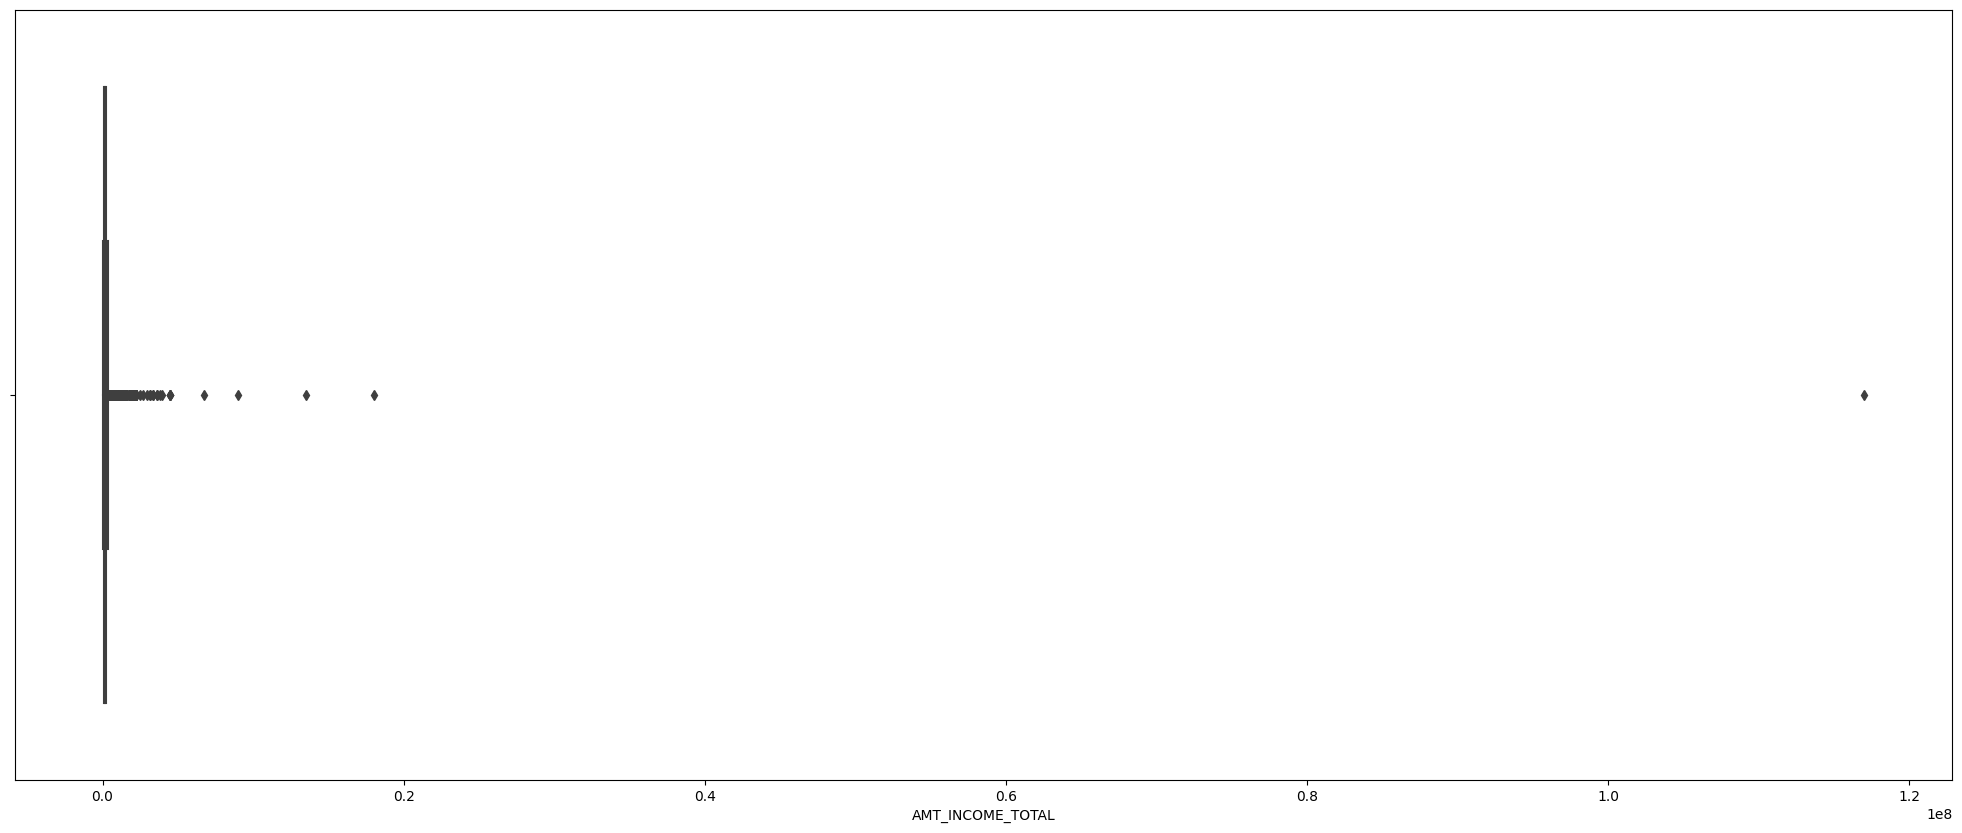

In [74]:
plt.figure(figsize=(25,10))
sns.boxplot(data = df, x='AMT_INCOME_TOTAL')

In [75]:
df['AMT_INCOME_TOTAL'].min()

25650.0

In [76]:
df['AMT_INCOME_TOTAL'].max()

117000000.0

IQR is used to measure variability by dividing a data set into quartiles. The data is sorted in ascending order and split into 4 equal parts. Q1, Q2, Q3 called first, second and third quartiles are the values which separate the 4 equal parts.

Q1 represents the 25th percentile of the data.
Q2 represents the 50th percentile of the data.
Q3 represents the 75th percentile of the data.

In [77]:
Q1, Q3 = np.percentile(df['AMT_INCOME_TOTAL'],[25,75])

In [78]:
Q1

112500.0

In [79]:
Q3

202500.0

IQR is the range between the first and the third quartiles namely Q1 and Q3: IQR = Q3 – Q1. The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

In [80]:
IQR = Q3 - Q1

In [81]:
IQR

90000.0

In [82]:
lower_x = Q1 - 1.5 * IQR
Upper_x = Q3 + 1.5 * IQR

In [83]:
lower_x

-22500.0

In [84]:
Upper_x

337500.0

In [85]:
df = df.loc[df['AMT_INCOME_TOTAL'] < Upper_x]

<Axes: xlabel='AMT_INCOME_TOTAL'>

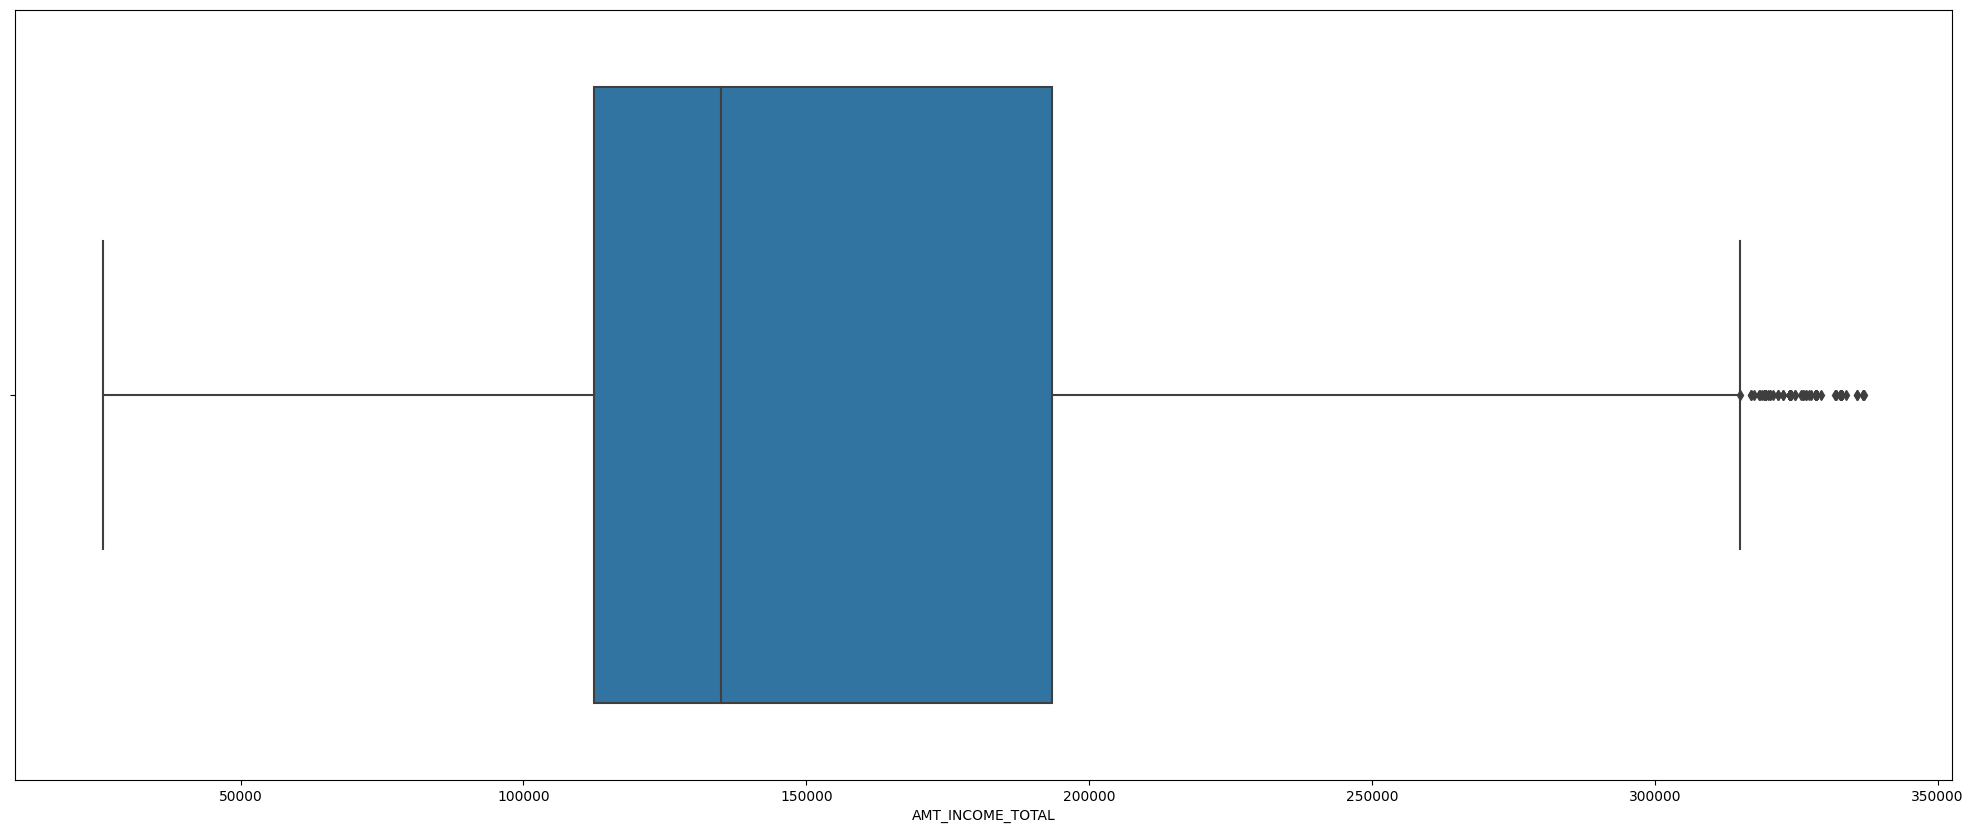

In [86]:
plt.figure(figsize=(25,10))
sns.boxplot(data = df, x='AMT_INCOME_TOTAL')

In [87]:
df['AMT_INCOME_TOTAL'].min()

25650.0

In [88]:
df['AMT_INCOME_TOTAL'].max()

337050.0

# Dealing with "XNA" in Code Gender Columns

In [89]:
df['CODE_GENDER'].value_counts()

F      194847
M       96835
XNA         4
Name: CODE_GENDER, dtype: int64

In [90]:
df['CODE_GENDER'] = df['CODE_GENDER'].str.replace('XNA','F')

C:\Users\Akash Pandey\AppData\Local\Temp\ipykernel_27100\4249659866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CODE_GENDER'] = df['CODE_GENDER'].str.replace('XNA','F')


In [91]:
df['CODE_GENDER'].value_counts()

F    194851
M     96835
Name: CODE_GENDER, dtype: int64

# Dealing with "XNA" in Organisation type Columns

In [92]:
df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    62727
XNA                       54134
Self-employed             36680
Other                     15762
Medicine                  10778
Business Entity Type 2    10031
Government                 9978
School                     8588
Trade: type 7              7437
Kindergarten               6762
Construction               6191
Business Entity Type 1     5560
Transport: type 4          5053
Trade: type 3              3366
Industry: type 3           3197
Security                   3100
Industry: type 9           3064
Housing                    2855
Industry: type 11          2614
Agriculture                2384
Military                   2294
Bank                       2279
Police                     2150
Postal                     2116
Transport: type 2          2114
Security Ministries        1766
Trade: type 2              1755
Restaurant                 1737
Services                   1472
Industry: type 7           1262
University                 1225
Transpor

In [93]:
df = df.loc[df['ORGANIZATION_TYPE'] != 'XNA' ]

In [94]:
df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    62727
Self-employed             36680
Other                     15762
Medicine                  10778
Business Entity Type 2    10031
Government                 9978
School                     8588
Trade: type 7              7437
Kindergarten               6762
Construction               6191
Business Entity Type 1     5560
Transport: type 4          5053
Trade: type 3              3366
Industry: type 3           3197
Security                   3100
Industry: type 9           3064
Housing                    2855
Industry: type 11          2614
Agriculture                2384
Military                   2294
Bank                       2279
Police                     2150
Postal                     2116
Transport: type 2          2114
Security Ministries        1766
Trade: type 2              1755
Restaurant                 1737
Services                   1472
Industry: type 7           1262
University                 1225
Transport: type 3          1138
Industry

In [95]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.022625,-16705,-7258,-9798.0,-259,1,1,0,1,0,0,1.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Self-employed,0.530725,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,1,1,0,1,0,1,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.535722,6.0,0.0,6.0,0.0,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,

# EDA Data Analysis Analysis

# Filter the Data for;
* 0 means who make payment as on time
* 1 mean that who is defaulter

In [96]:
df0 = df.loc[df['TARGET'] == 0 ]
df1 = df.loc[df['TARGET'] == 1 ]

In [97]:
df0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307503,456247,0,Cash loans,F,N,Y,0,112500.0,345510.0,17770.5,247500.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.022800,-11870,-399,-675.0,-3936,1,1,0,1,0,1,1.0,2,2,SATURDAY,11,0,0,0,0,0,0,Bank,0.501221,9.0,3.0,9.0,2.0,-2315.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.022625,-16705,-7258,-9798.0,-259,1,1,0,1,0,0,1.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Self-employed,0.530725,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied

In [98]:
df1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,1,1,0,1,0,0,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,1,1,0,1,0,0,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.0,0.0,0.0,0.0,-1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45.0,-4409,1,1,1,1,1,0,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,1.0,0.0,1.0,0.0,-1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,900000.0,Family,Commercial associate,Incomplete higher,Single / not married,With parents,0.030755,-10199,-2015,-4802.0,-1038,1,1,0,1,0,0,1.0,2,2,SUNDAY,13,0,0,0,0,1,1,Industry: type 4,0.432340,0.0,0.0,0.0,0.0,-591.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,Cash loans,M,N,N,1,207000.0,450000.0,32746.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.020246,-9918,-3048,-8507.0,-2580,1,1,1,1,0,0,3.0,3,3,MONDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.329708,0.0,0.0,0.0,0.0,-324.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307475,456215,1,Cash loans,F,N,N,1,144000.0,1303200.0,46809.0,1125000.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,0.007330,-13416,-2405,-500.0,-4704,1,1,1,1,0,0,3.0,2,2,THURSDAY,13,0,0,0,0,0,0,Construction,0.583214,0.0,0.0,0.0,0.0,-1492.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307481,456225,1,Cash loans,M,N,Y,0,225000.0,297000.0,19975.5,297000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.008575,-20644,-3147,-8921.0,-3832,1,1,0,1,1,0,2.0,2,2,FRIDAY,15,0,0,0,0,0,0,Business Entity Type 3,0.713524,0.0,0.0,0.0,0.0,-2941.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307489,456233,1,Cash loan

# Exporting the Cleaned Data in CSV Formate

In [99]:
df.to_csv(r'E:\CSV_Files\Project\Credit EDA Case Study\CleaningData.csv')

* Target Analysis

<Axes: title={'center': 'Defaulter VS Non-Defaulter'}, xlabel='TARGET', ylabel='count'>

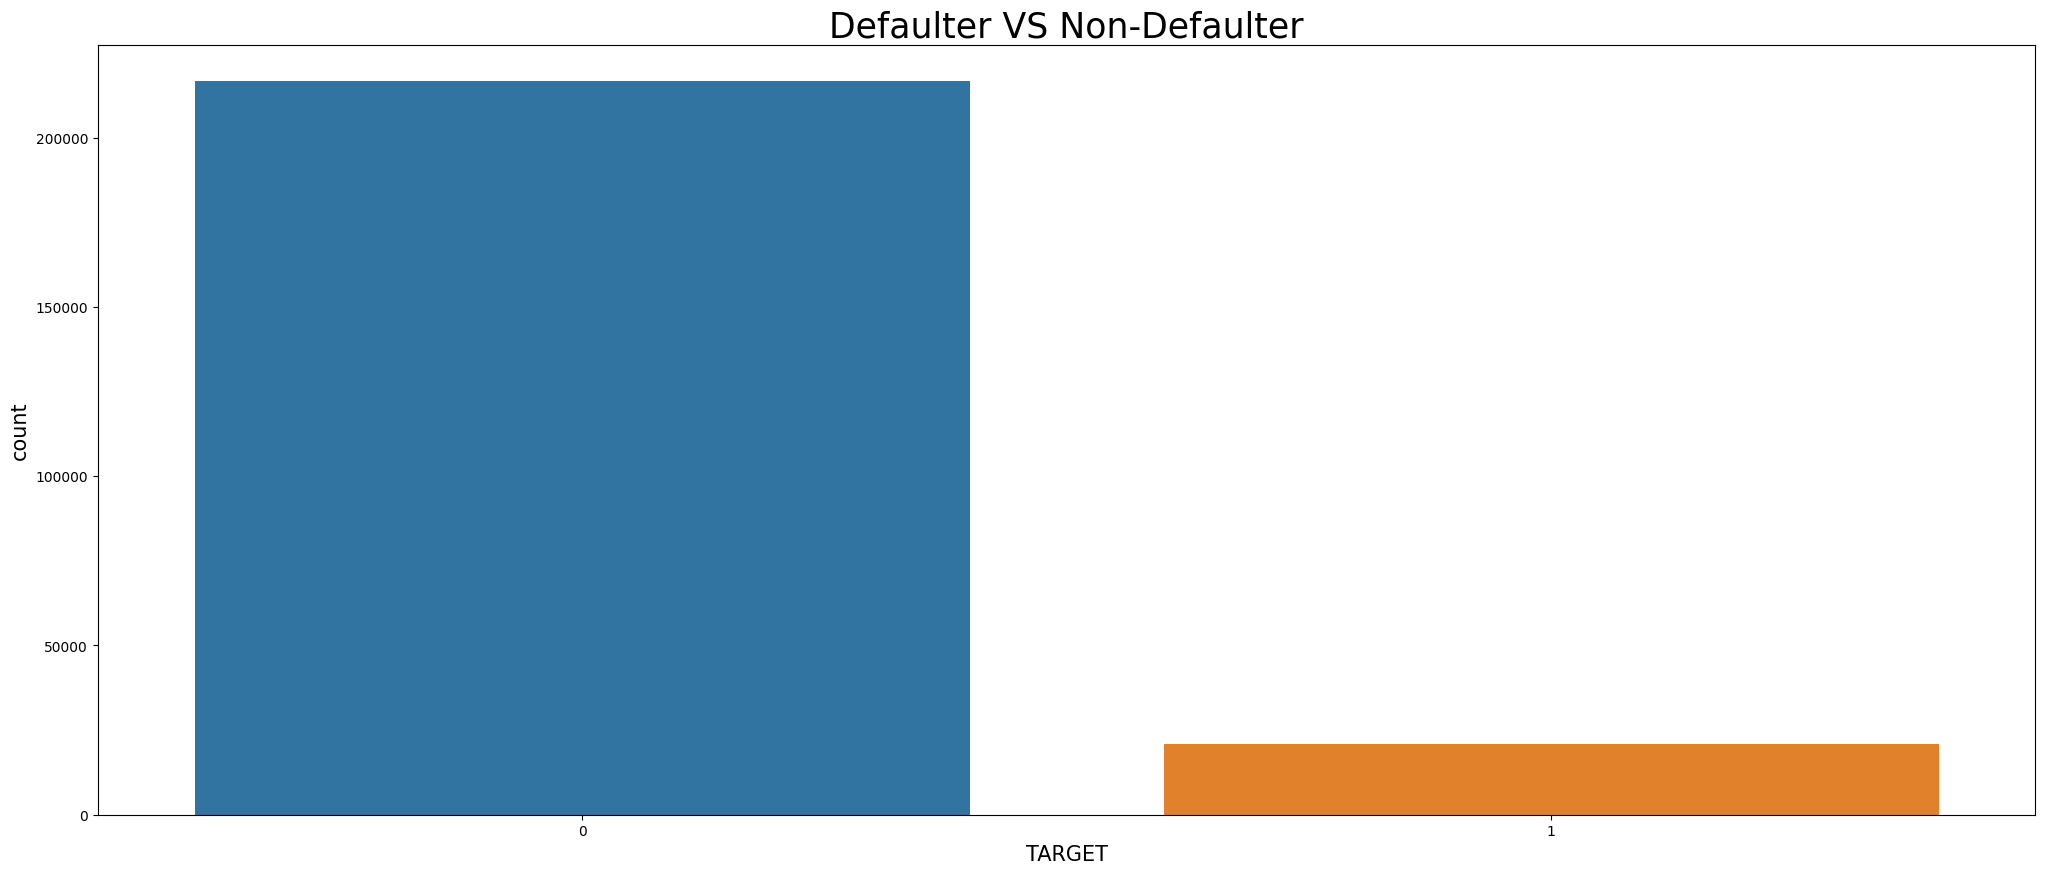

In [100]:
plt.figure(figsize=(25,10))
plt.title('Defaulter VS Non-Defaulter',fontsize= 25)
plt.xlabel('Targets',fontsize= 15)
plt.ylabel('Count',fontsize= 15)
sns.countplot(data= df,x='TARGET')

* Gender for Non- Defaulter VS Defaulter

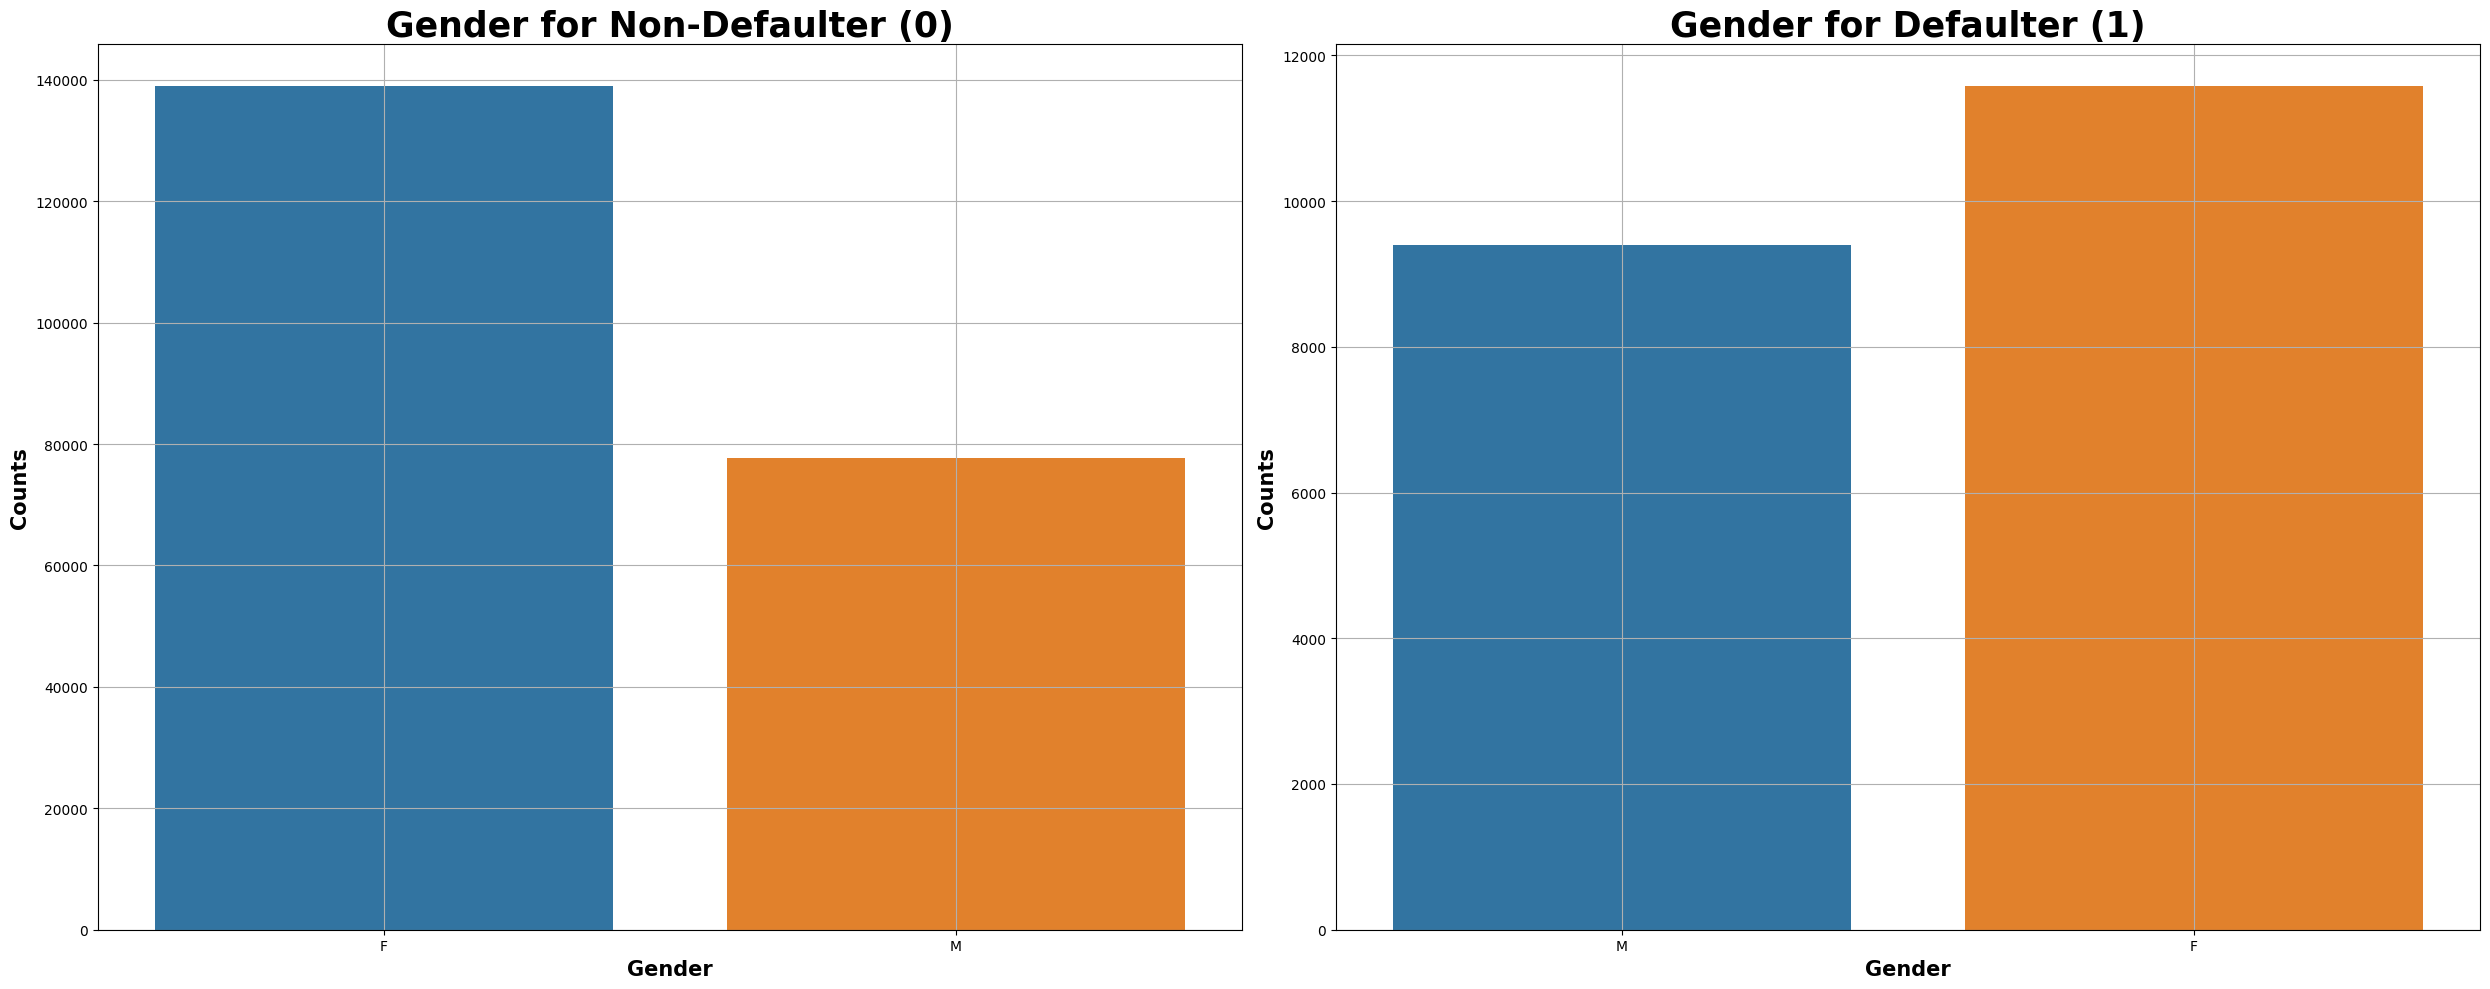

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
sns.countplot(data=df0,x='CODE_GENDER',ax=ax1)
sns.countplot(data=df1,x='CODE_GENDER',ax=ax2)
ax1.set_title('Gender for Non-Defaulter (0)',fontsize=25,fontweight='bold')
ax2.set_title('Gender for Defaulter (1)',fontsize=25,fontweight='bold')
ax1.set_xlabel('Gender',fontsize=15,fontweight='bold')
ax1.set_ylabel('Counts',fontsize=15,fontweight='bold')
ax2.set_xlabel('Gender',fontsize=15,fontweight='bold')
ax2.set_ylabel('Counts',fontsize=15,fontweight='bold')
ax1.grid(True)  # Enable grid lines
ax2.grid(True)  # Enable grid lines

plt.tight_layout()

# Distribution of Income for Non- Defaulter and Defaulter

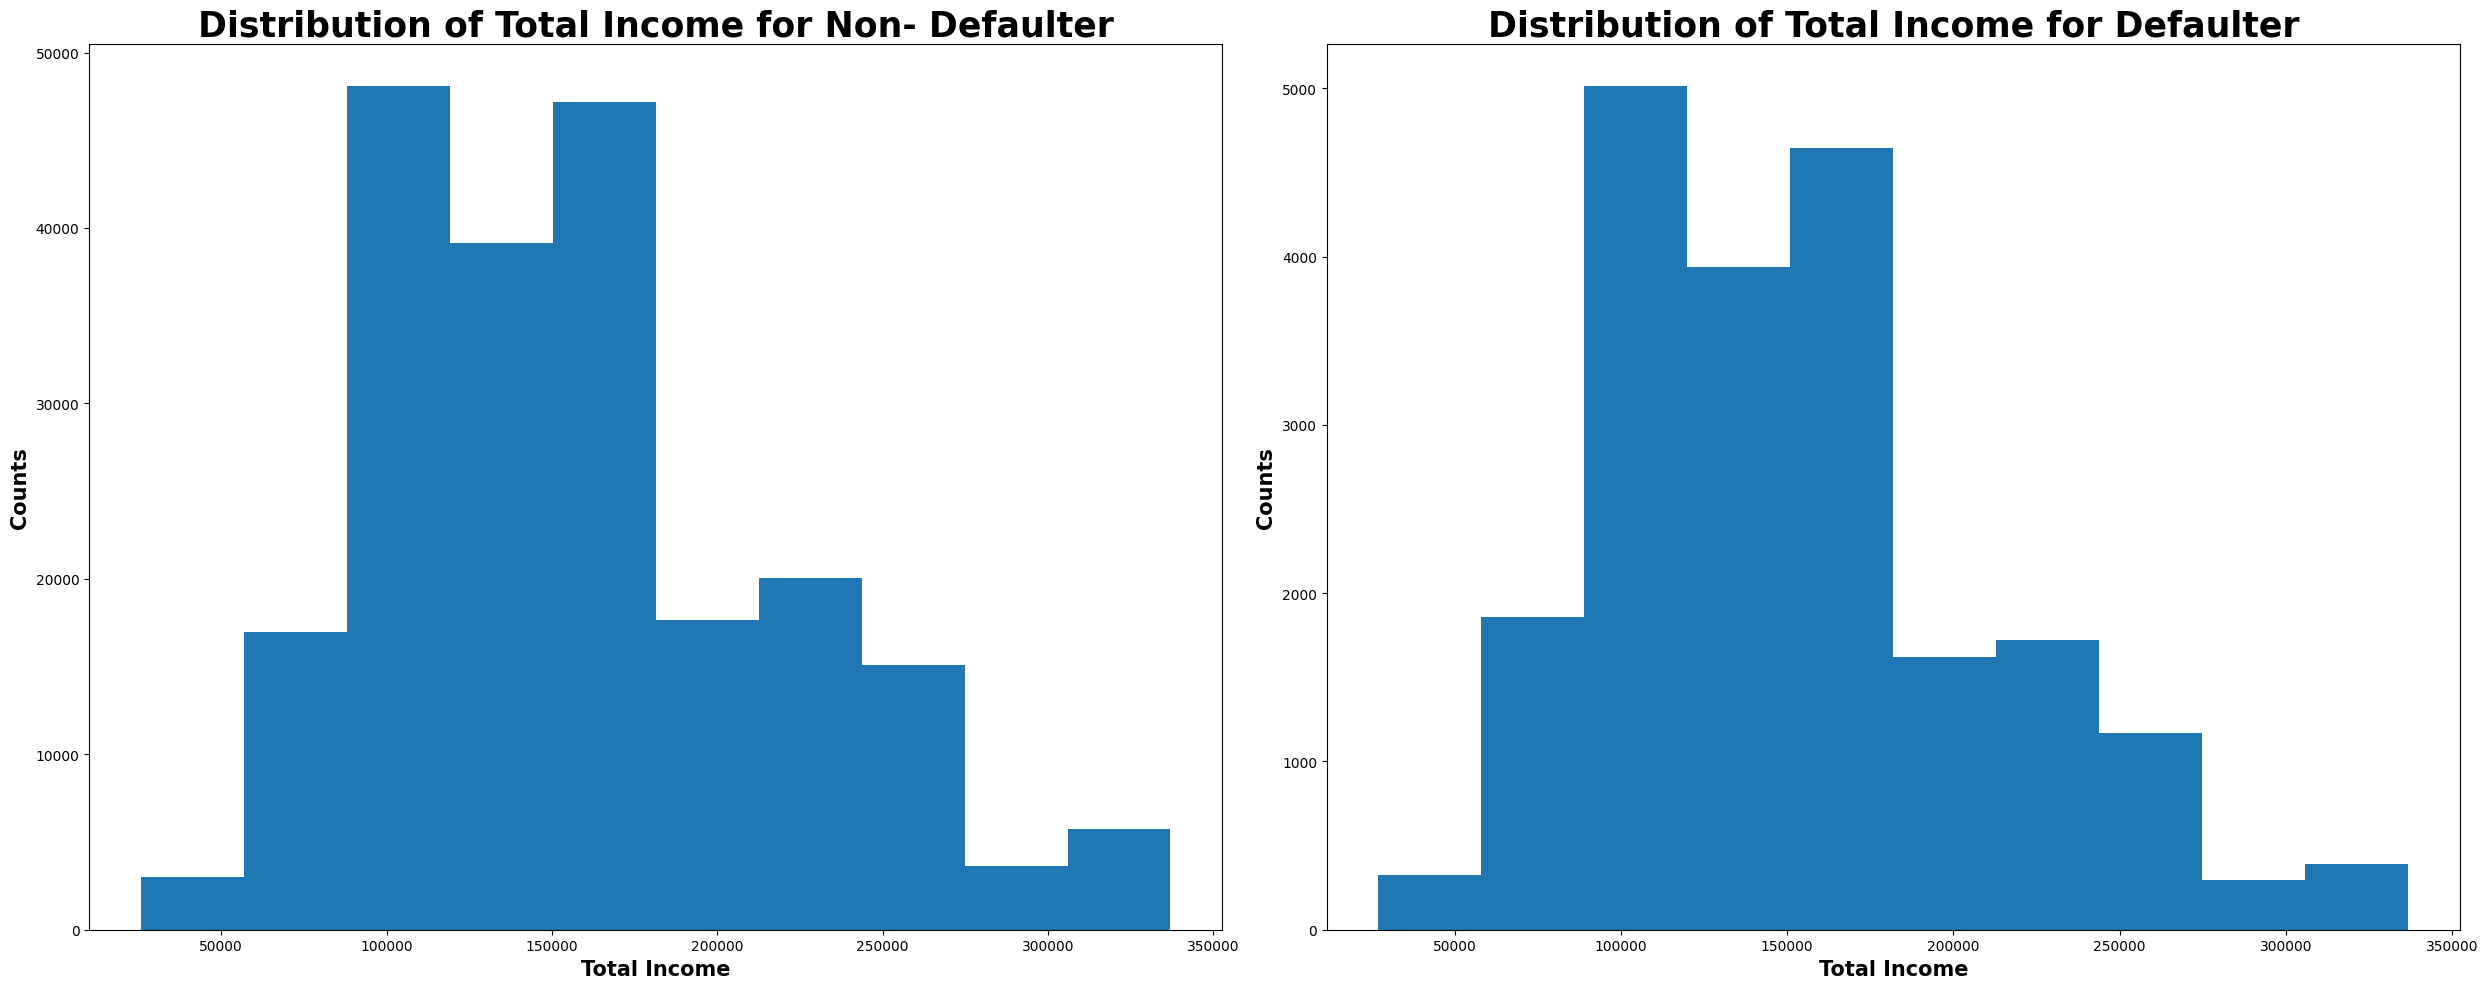

In [102]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
ax1.hist(df0['AMT_INCOME_TOTAL'])
ax2.hist(df1['AMT_INCOME_TOTAL'])
ax1.set_title('Distribution of Total Income for Non- Defaulter',fontsize=25,fontweight='bold')
ax2.set_title('Distribution of Total Income for Defaulter',fontsize=25,fontweight='bold')
ax1.set_xlabel('Total Income',fontsize=15,fontweight='bold')
ax1.set_ylabel('Counts',fontsize=15,fontweight='bold')
ax2.set_xlabel('Total Income',fontsize=15,fontweight='bold')
ax2.set_ylabel('Counts',fontsize=15,fontweight='bold')

plt.tight_layout()


# Loan Contract type for Non - Defauletr and Defaulter

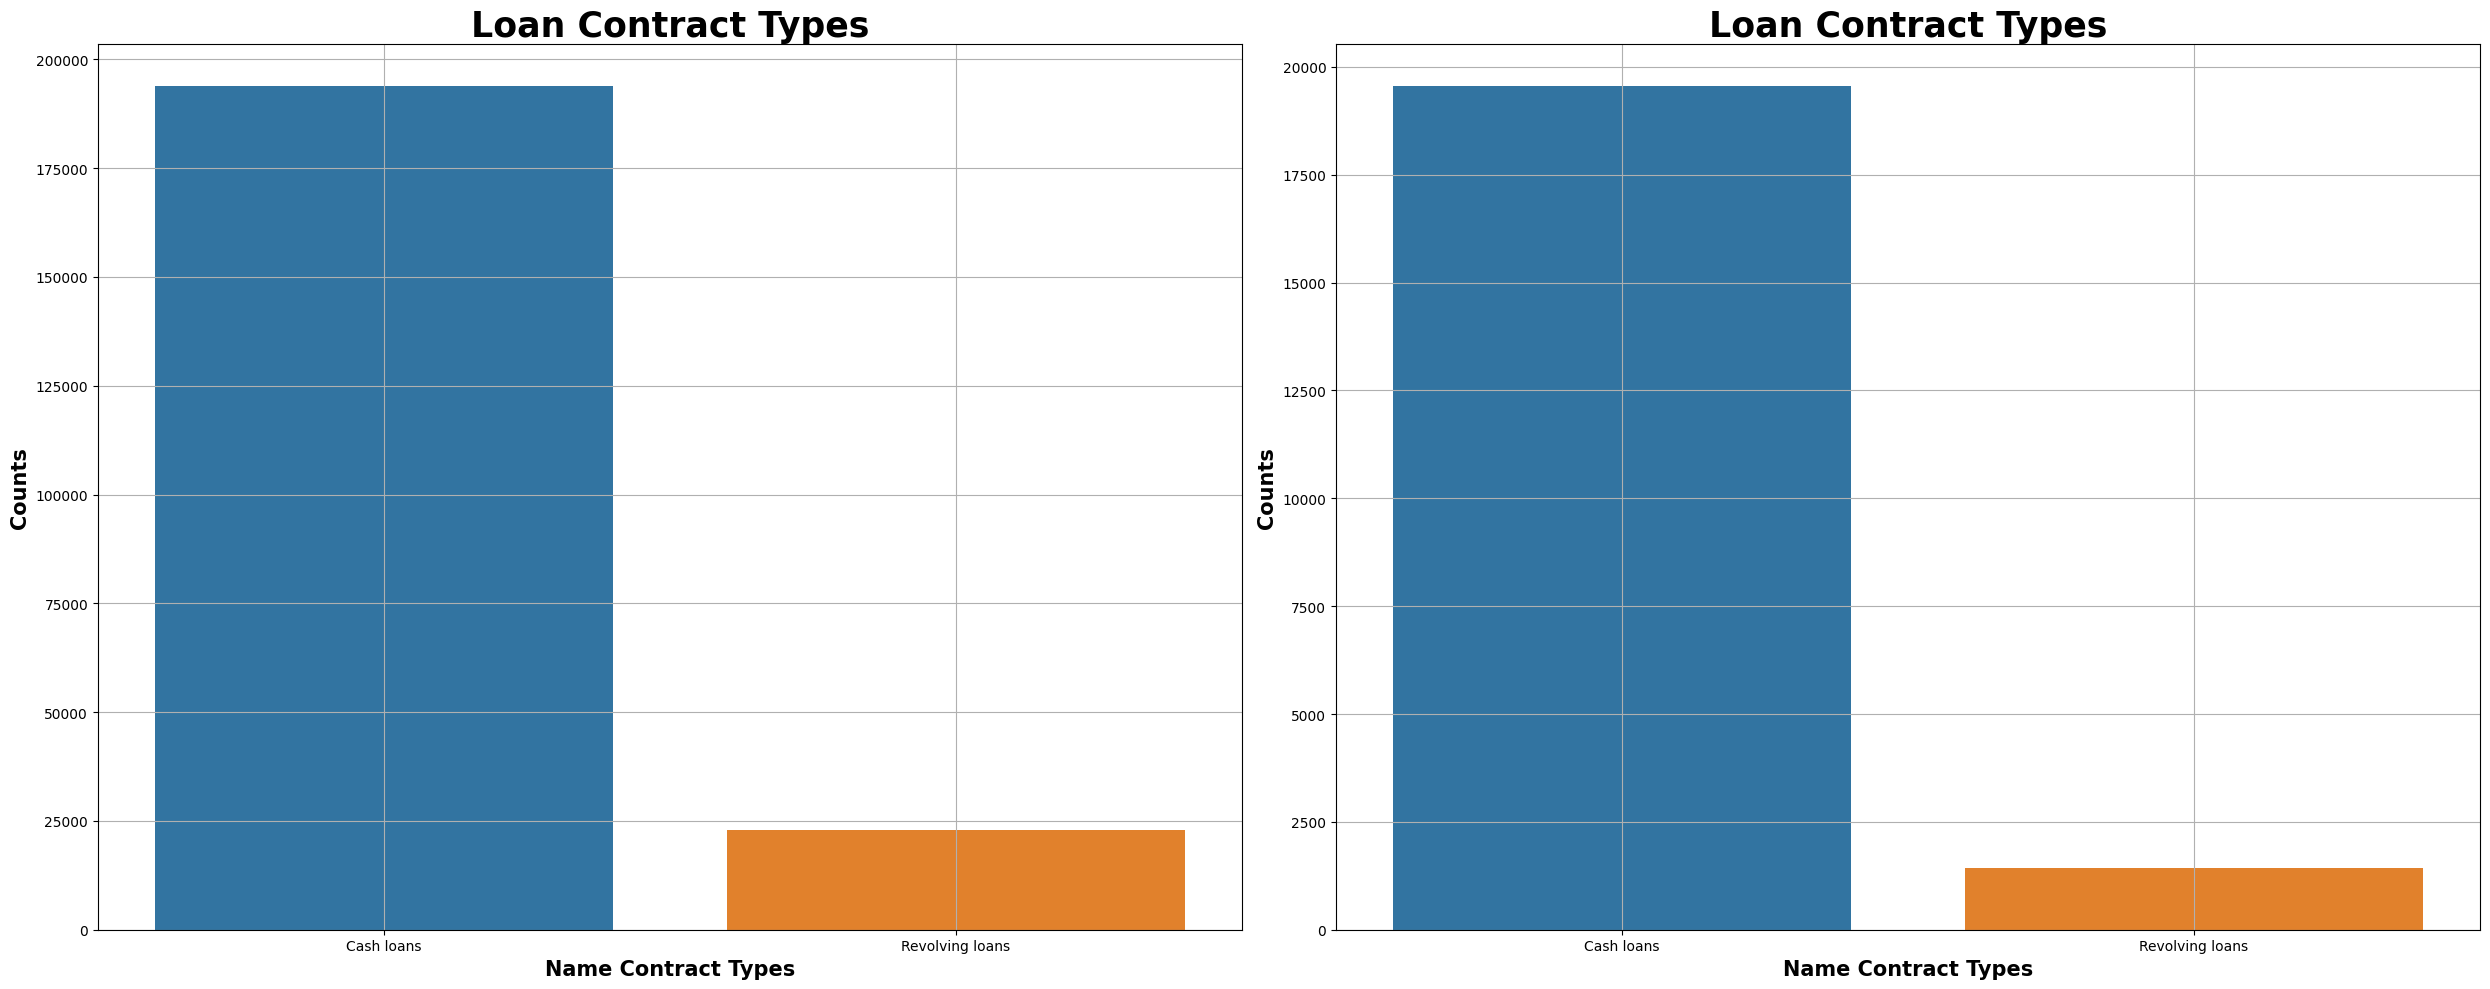

In [103]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
sns.countplot(data=df0,x='NAME_CONTRACT_TYPE',ax=ax1)
sns.countplot(data=df1,x='NAME_CONTRACT_TYPE',ax=ax2)
ax1.set_title('Loan Contract Types',fontsize=25,fontweight='bold')
ax2.set_title('Loan Contract Types',fontsize=25,fontweight='bold')
ax1.set_xlabel('Name Contract Types',fontsize=15,fontweight='bold')
ax1.set_ylabel('Counts',fontsize=15,fontweight='bold')
ax2.set_xlabel('Name Contract Types',fontsize=15,fontweight='bold')
ax2.set_ylabel('Counts',fontsize=15,fontweight='bold')
ax1.grid(True)  # Enable grid lines
ax2.grid(True)  # Enable grid lines

plt.tight_layout()

# Gender Wise Income for Non-Defaulter VS Defaulter

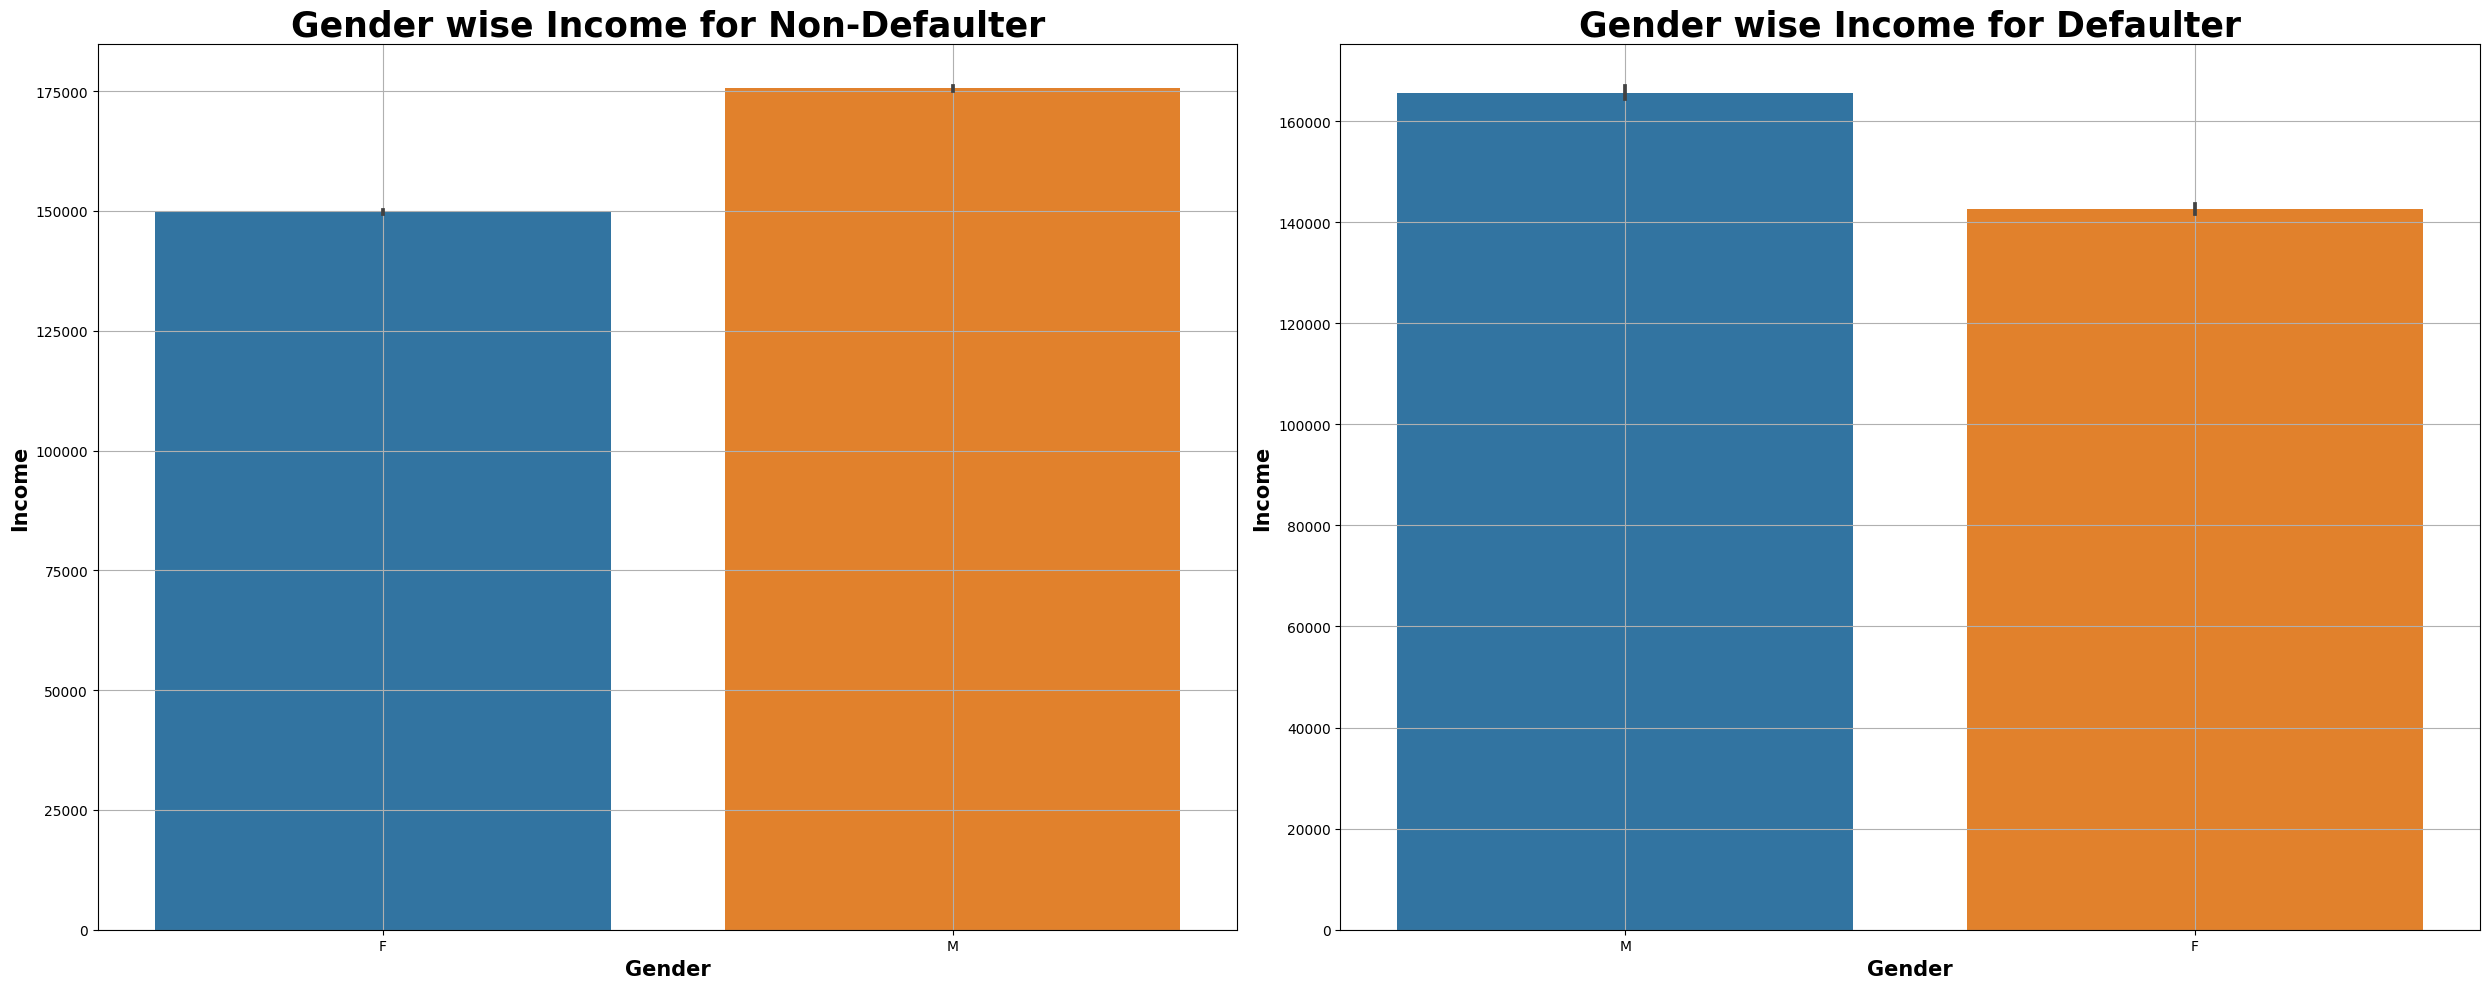

In [104]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
sns.barplot(data=df0,x='CODE_GENDER',y='AMT_INCOME_TOTAL',ax=ax1)
sns.barplot(data=df1,x='CODE_GENDER',y='AMT_INCOME_TOTAL',ax=ax2)
ax1.set_title('Gender wise Income for Non-Defaulter',fontsize=25,fontweight='bold')
ax2.set_title('Gender wise Income for Defaulter',fontsize=25,fontweight='bold')
ax1.set_xlabel('Gender',fontsize=15,fontweight='bold')
ax1.set_ylabel('Income',fontsize=15,fontweight='bold')
ax2.set_xlabel('Gender',fontsize=15,fontweight='bold')
ax2.set_ylabel('Income',fontsize=15,fontweight='bold')
ax1.grid(True)  # Enable grid lines
ax2.grid(True)  # Enable grid lines

plt.tight_layout()

# Organisation Type for Non-Defaulter VS Defaulter

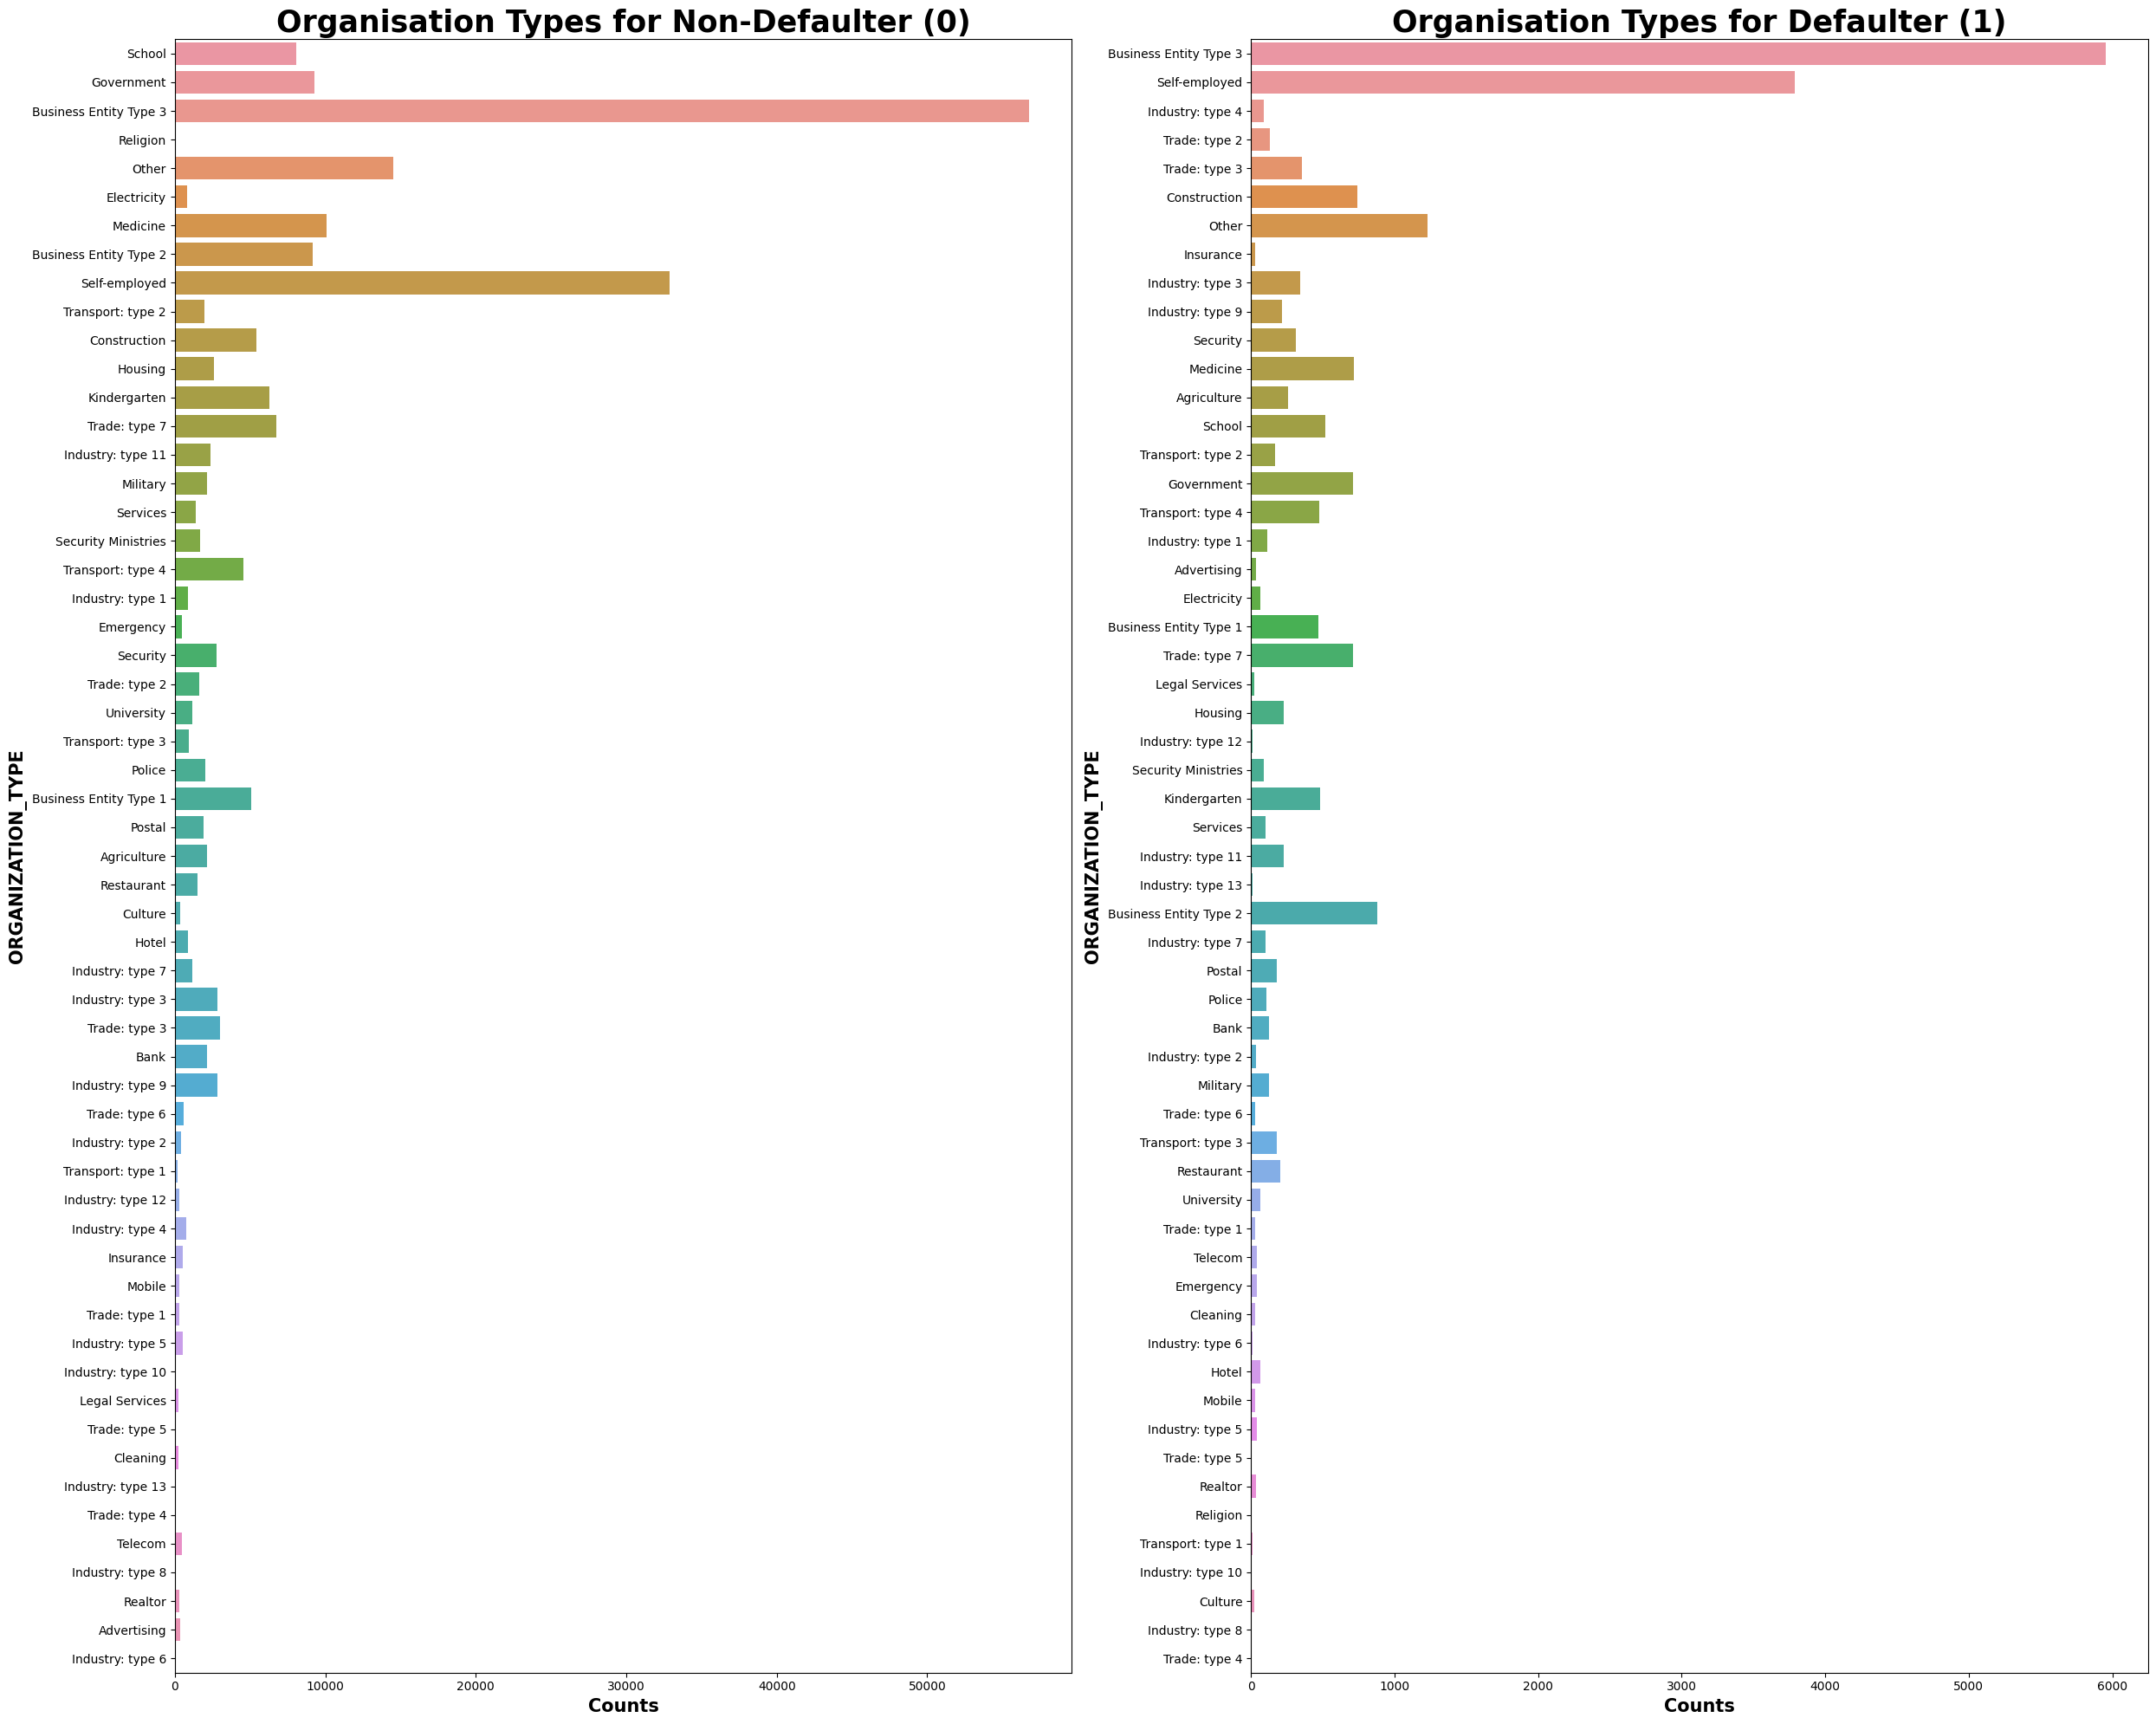

In [105]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 20))
sns.countplot(data=df0,y='ORGANIZATION_TYPE',ax=ax1)
sns.countplot(data=df1,y='ORGANIZATION_TYPE',ax=ax2)
ax1.set_title('Organisation Types for Non-Defaulter (0)',fontsize=25,fontweight='bold')
ax2.set_title('Organisation Types for Defaulter (1)',fontsize=25,fontweight='bold')
ax1.set_xlabel('Counts',fontsize=15,fontweight='bold')
ax1.set_ylabel('ORGANIZATION_TYPE',fontsize=15,fontweight='bold')
ax2.set_xlabel('Counts',fontsize=15,fontweight='bold')
ax2.set_ylabel('ORGANIZATION_TYPE',fontsize=15,fontweight='bold')


plt.tight_layout()

In [106]:
df['AMT_CREDIT'].min()

45000.0

In [107]:
df['AMT_CREDIT'].max()

3860019.0

# Distribution of Credit Amount for Non-Defaulter VS Defaulter

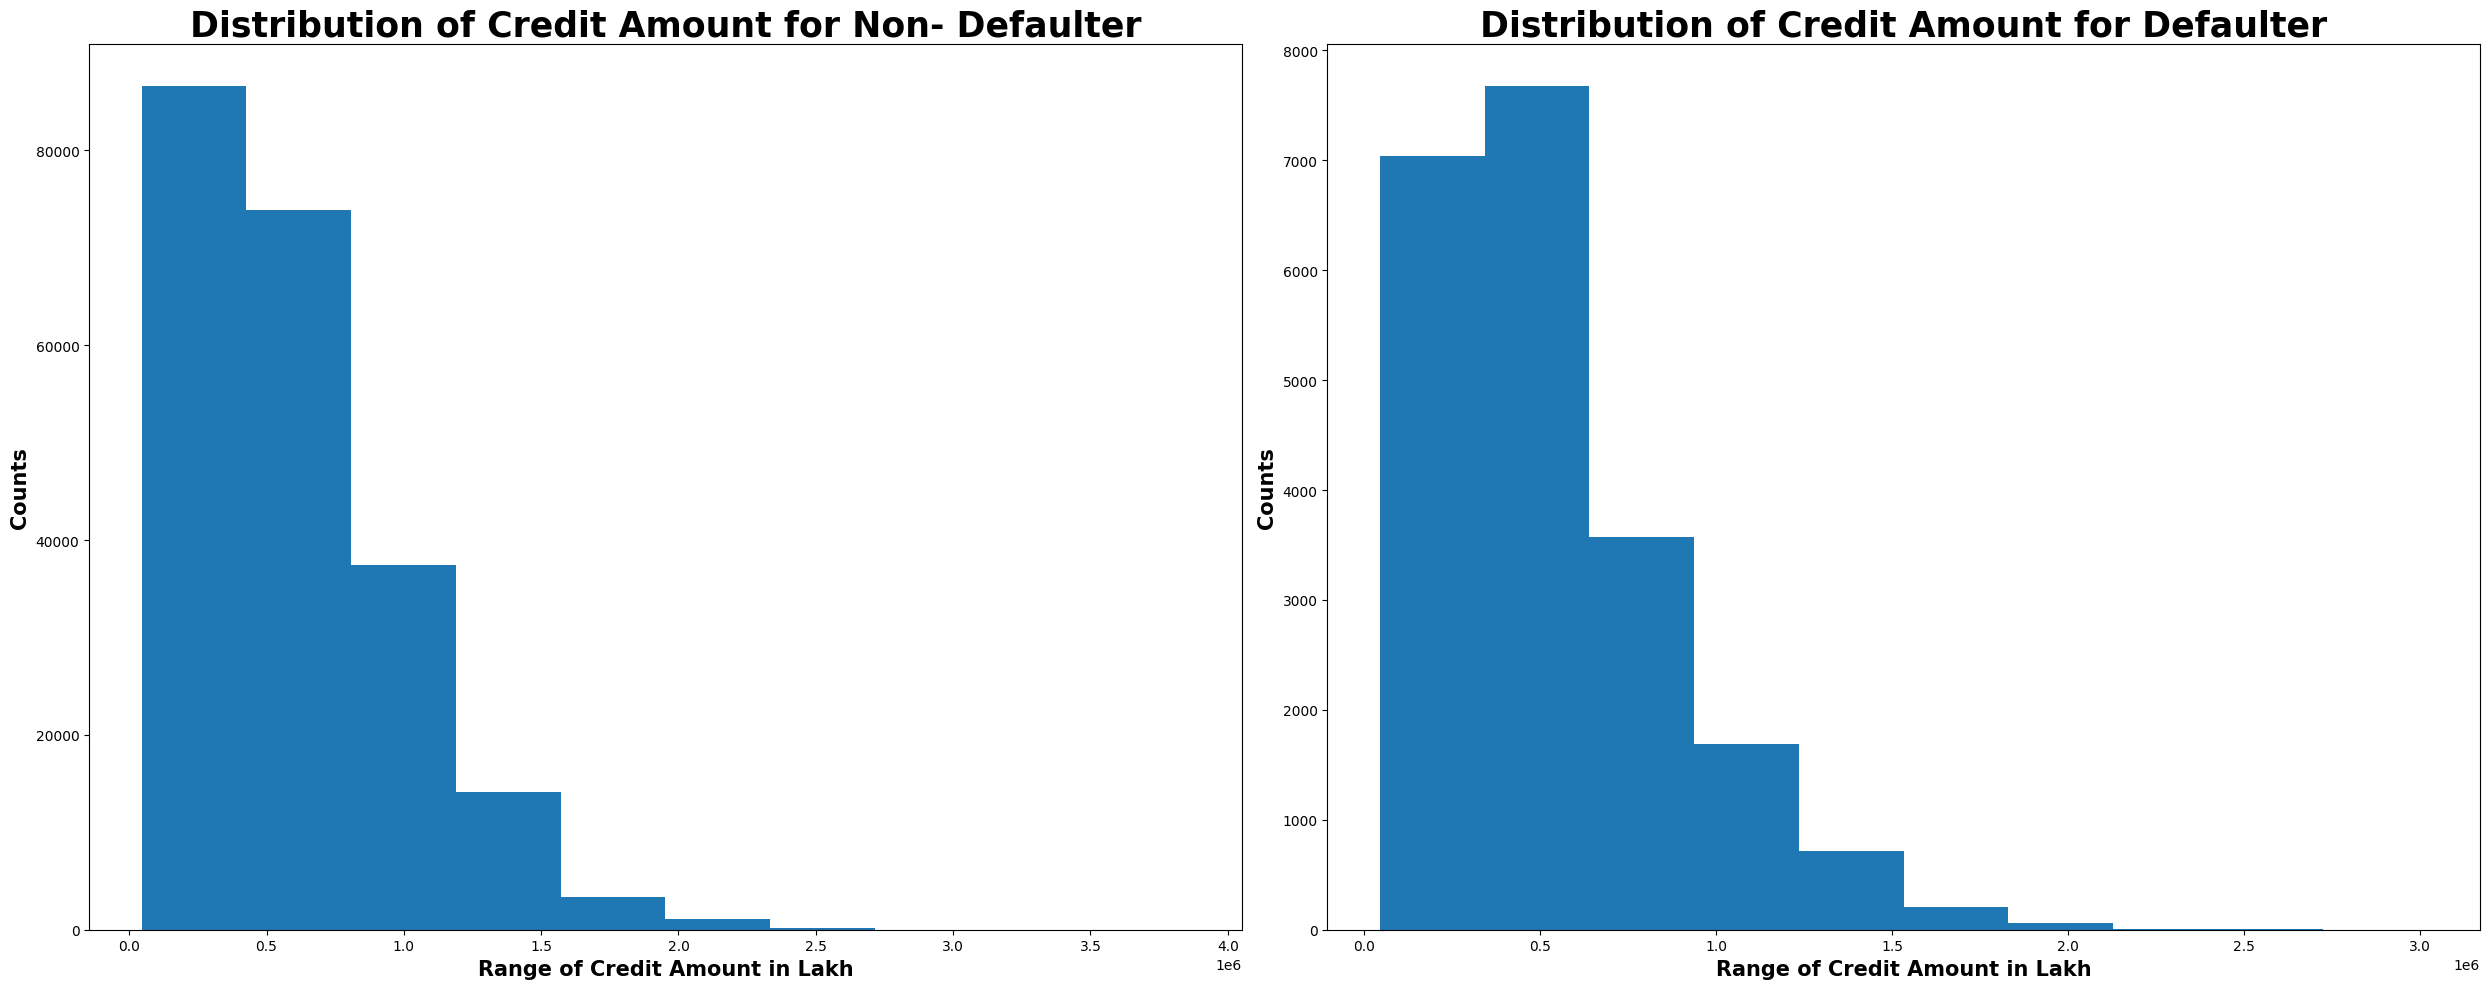

In [108]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
ax1.hist(df0['AMT_CREDIT'])
ax2.hist(df1['AMT_CREDIT'])
ax1.set_title('Distribution of Credit Amount for Non- Defaulter',fontsize=25,fontweight='bold')
ax2.set_title('Distribution of Credit Amount for Defaulter',fontsize=25,fontweight='bold')
ax1.set_xlabel('Range of Credit Amount in Lakh',fontsize=15,fontweight='bold')
ax1.set_ylabel('Counts',fontsize=15,fontweight='bold')
ax2.set_xlabel('Range of Credit Amount in Lakh',fontsize=15,fontweight='bold')
ax2.set_ylabel('Counts',fontsize=15,fontweight='bold')


plt.tight_layout()
plt.show()


# # Gender Wise Credit Amount for Non-Defaulter VS Defaulter

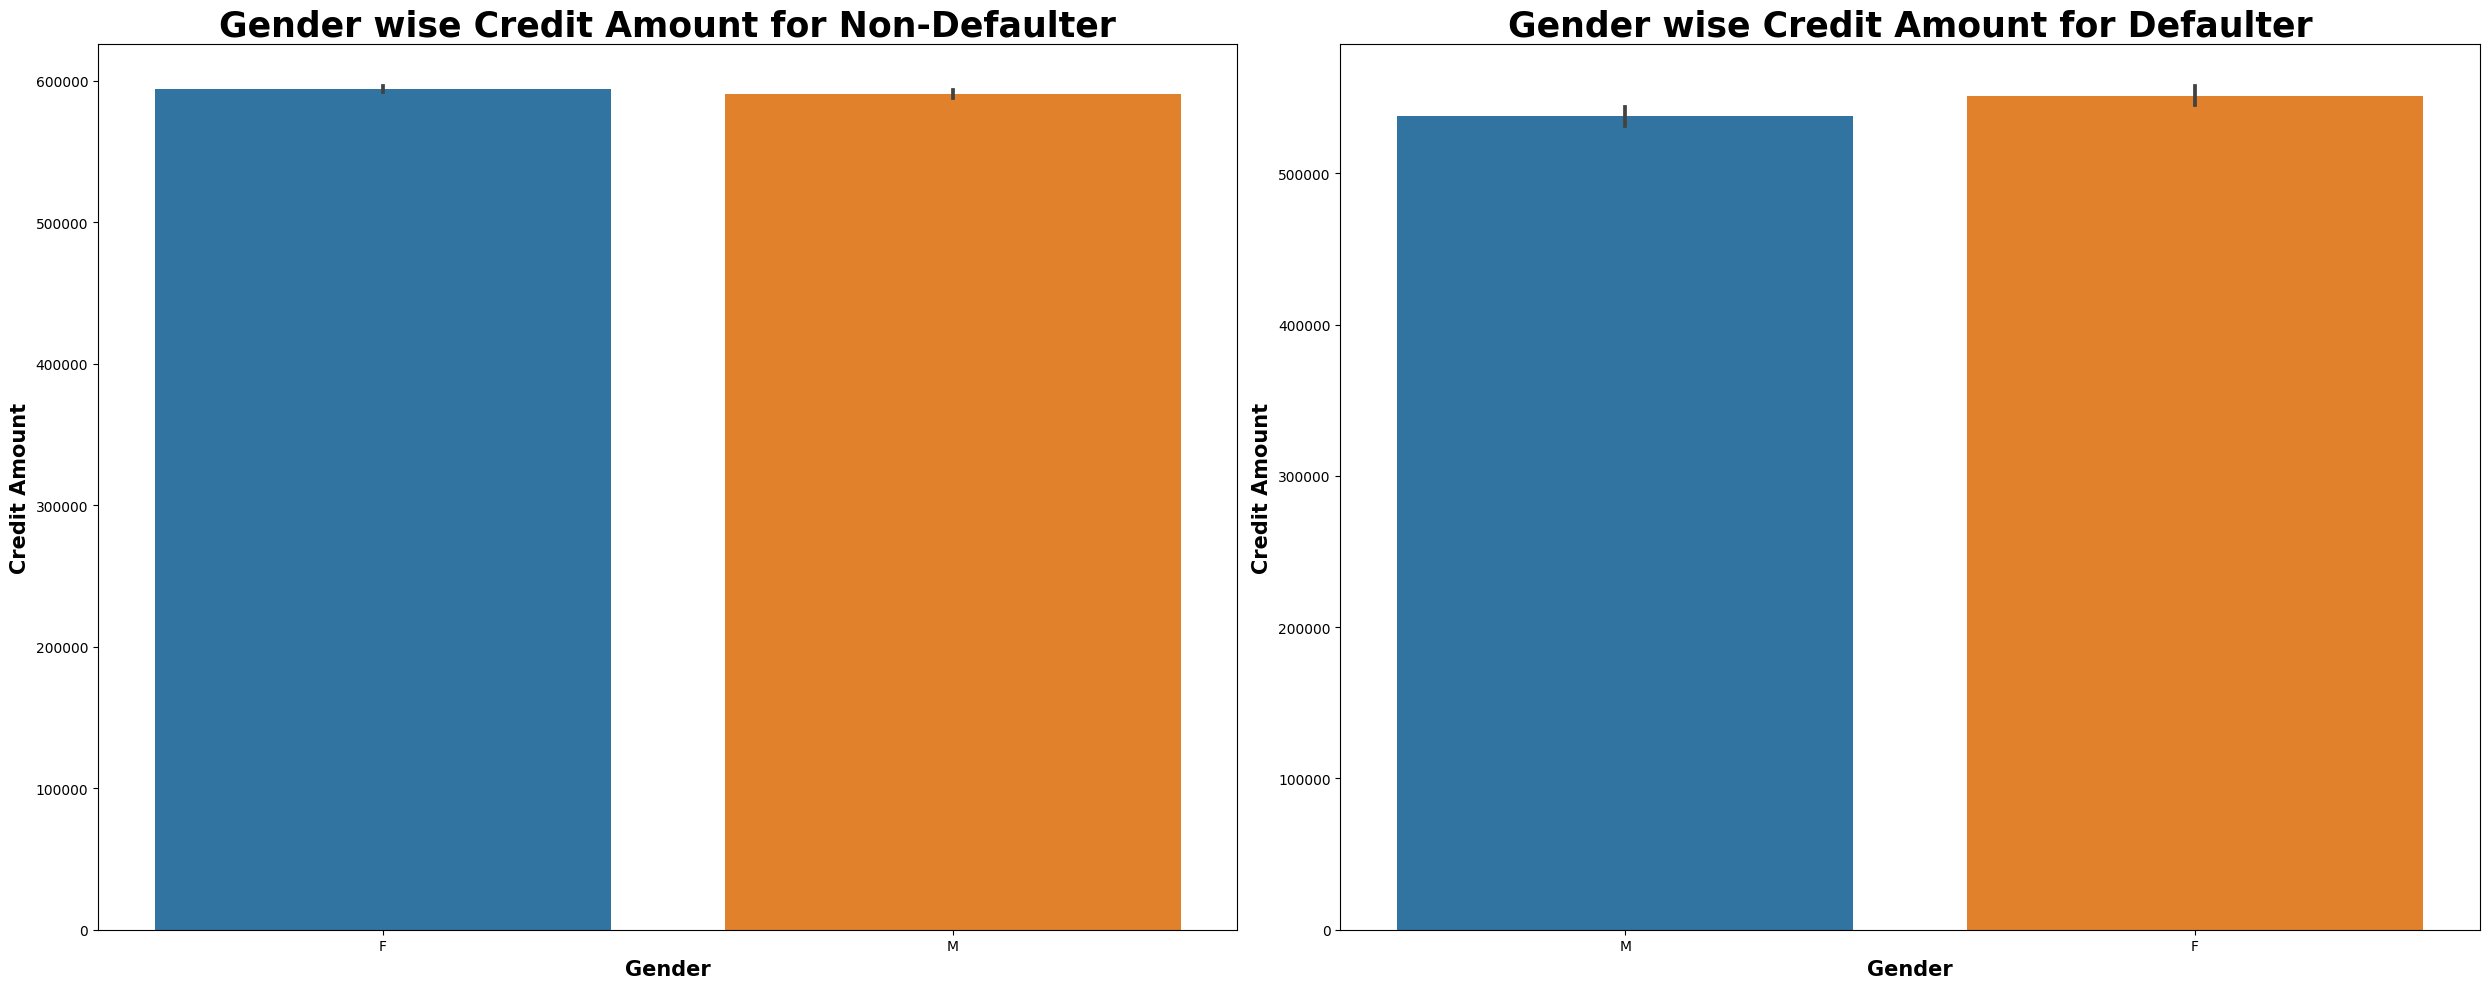

In [109]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
sns.barplot(data=df0,x='CODE_GENDER',y='AMT_CREDIT',ax=ax1)
sns.barplot(data=df1,x='CODE_GENDER',y='AMT_CREDIT',ax=ax2)
ax1.set_title('Gender wise Credit Amount for Non-Defaulter',fontsize=25,fontweight='bold')
ax2.set_title('Gender wise Credit Amount for Defaulter',fontsize=25,fontweight='bold')
ax1.set_xlabel('Gender',fontsize=15,fontweight='bold')
ax1.set_ylabel('Credit Amount',fontsize=15,fontweight='bold')
ax2.set_xlabel('Gender',fontsize=15,fontweight='bold')
ax2.set_ylabel('Credit Amount',fontsize=15,fontweight='bold')


plt.tight_layout()

# # Gender Wise Education Type for Non-Defaulter VS Defaulter

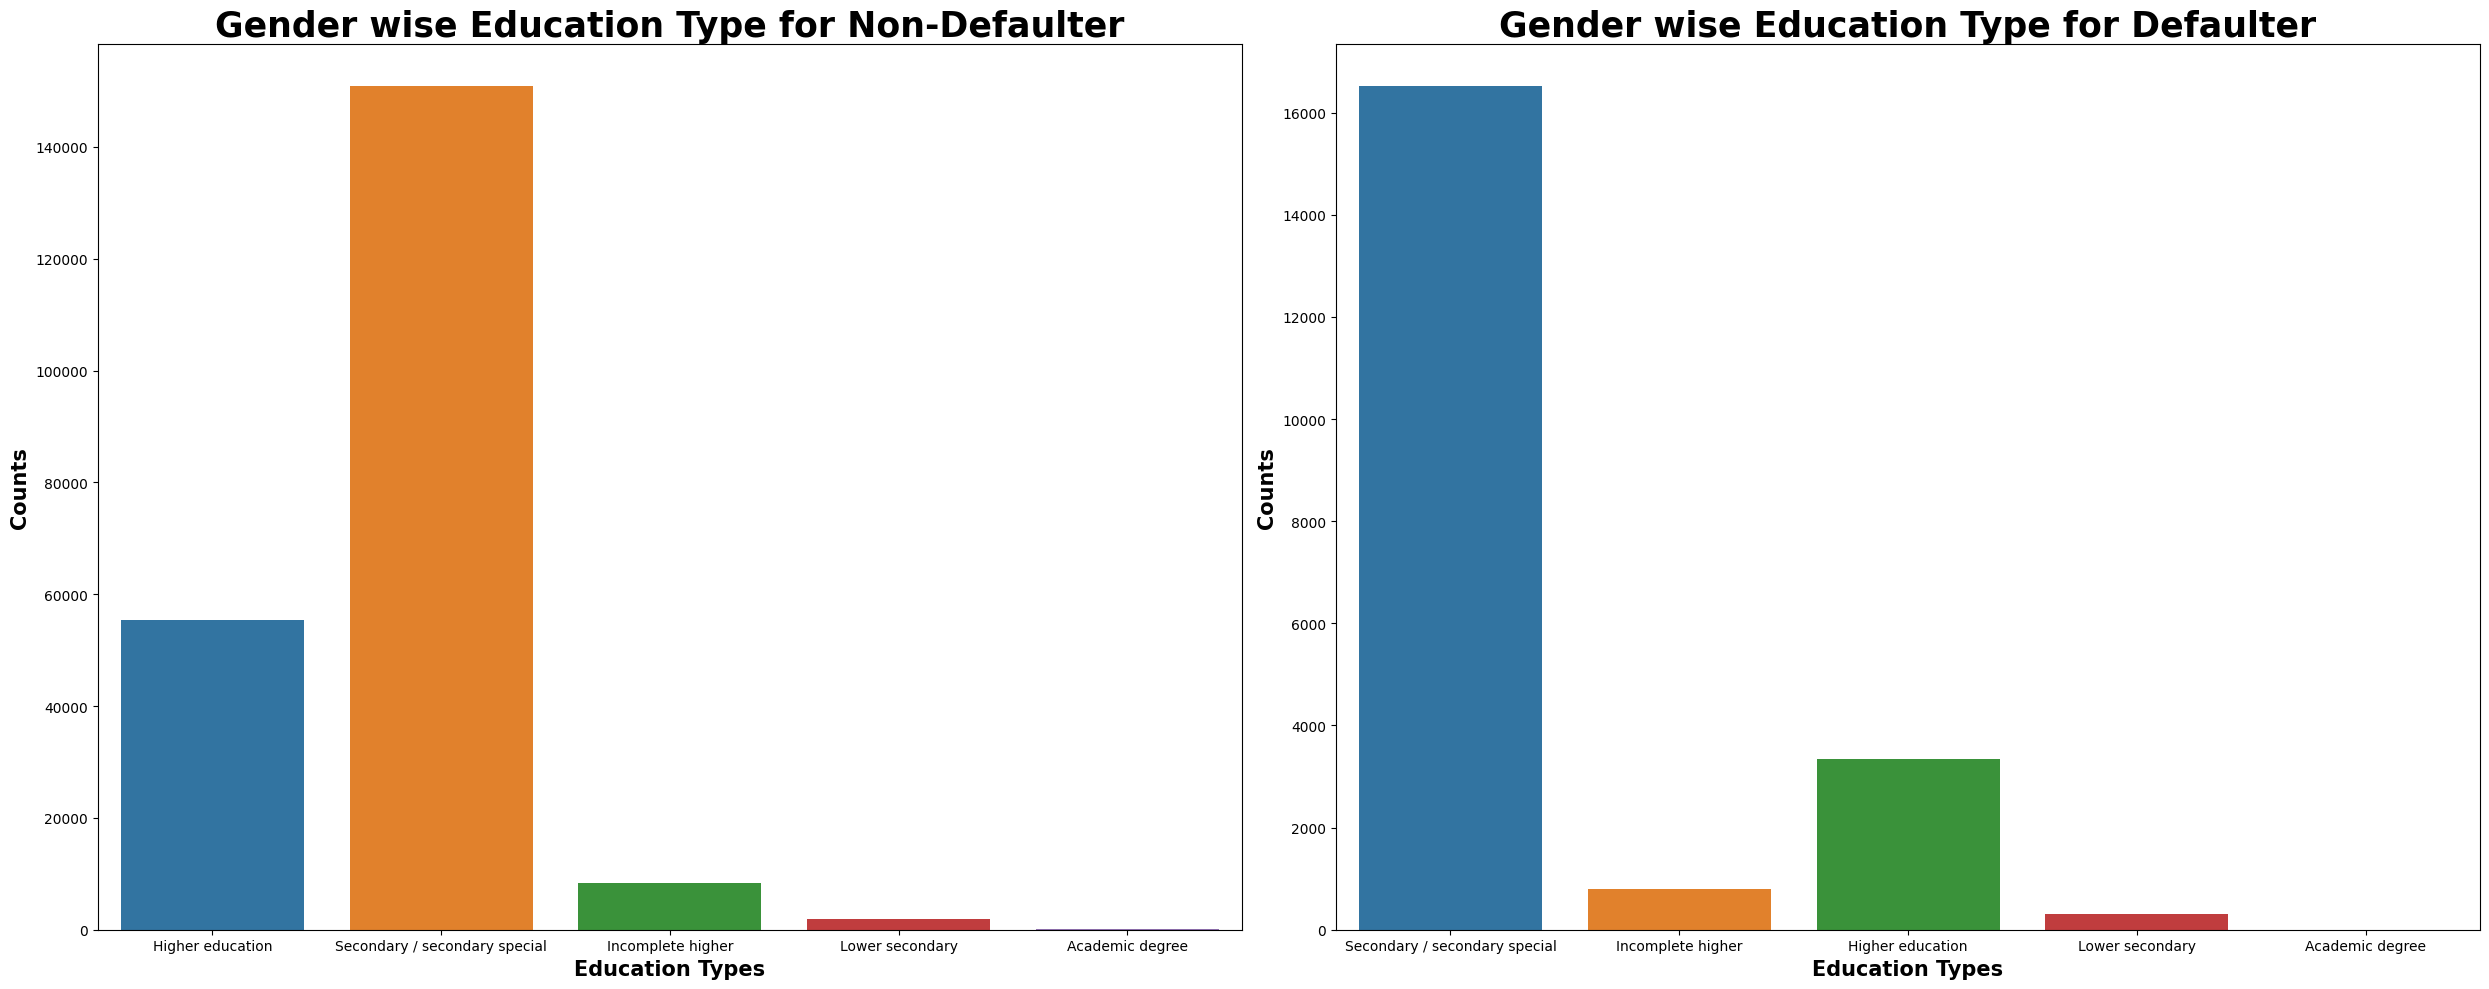

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
sns.countplot(data=df0,x='NAME_EDUCATION_TYPE',ax=ax1)
sns.countplot(data=df1,x='NAME_EDUCATION_TYPE',ax=ax2)
ax1.set_title('Gender wise Education Type for Non-Defaulter',fontsize=25,fontweight='bold')
ax2.set_title('Gender wise Education Type for Defaulter',fontsize=25,fontweight='bold')
ax1.set_xlabel('Education Types',fontsize=15,fontweight='bold')
ax1.set_ylabel('Counts',fontsize=15,fontweight='bold')
ax2.set_xlabel('Education Types',fontsize=15,fontweight='bold')
ax2.set_ylabel('Counts',fontsize=15,fontweight='bold')


plt.tight_layout()

# Family Status for Non-Defaulter VS Defaulter

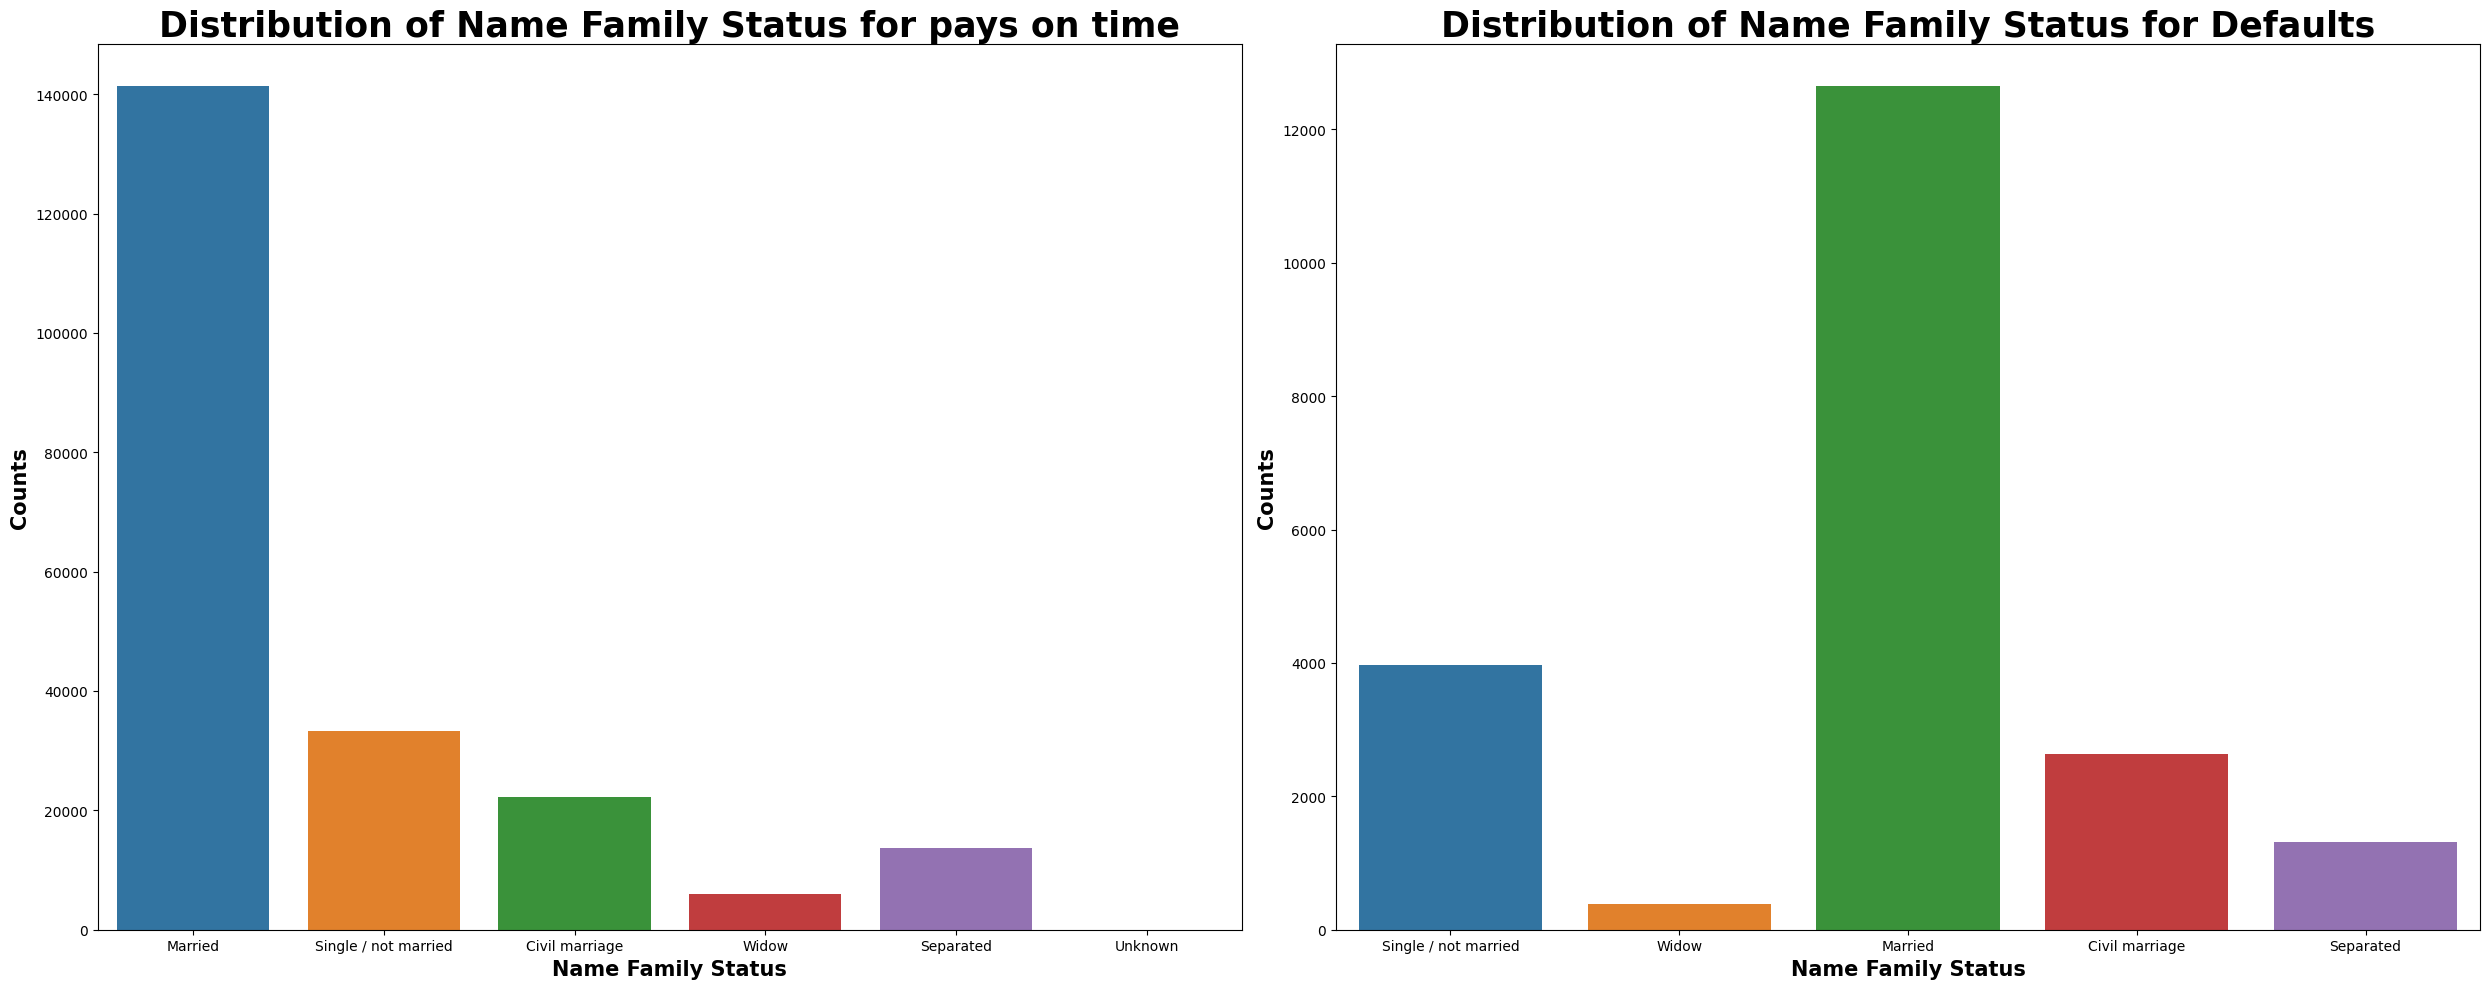

In [111]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
sns.countplot(data=df0,x='NAME_FAMILY_STATUS',ax=ax1)
sns.countplot(data=df1,x='NAME_FAMILY_STATUS',ax=ax2)
ax1.set_title('Distribution of Name Family Status for pays on time',fontsize=25,fontweight='bold')
ax2.set_title('Distribution of Name Family Status for Defaults',fontsize=25,fontweight='bold')
ax1.set_xlabel('Name Family Status',fontsize=15,fontweight='bold')
ax1.set_ylabel('Counts',fontsize=15,fontweight='bold')
ax2.set_xlabel('Name Family Status',fontsize=15,fontweight='bold')
ax2.set_ylabel('Counts',fontsize=15,fontweight='bold')


plt.tight_layout()

# Name Housing Type for Non-Defaulter VS Defaulter

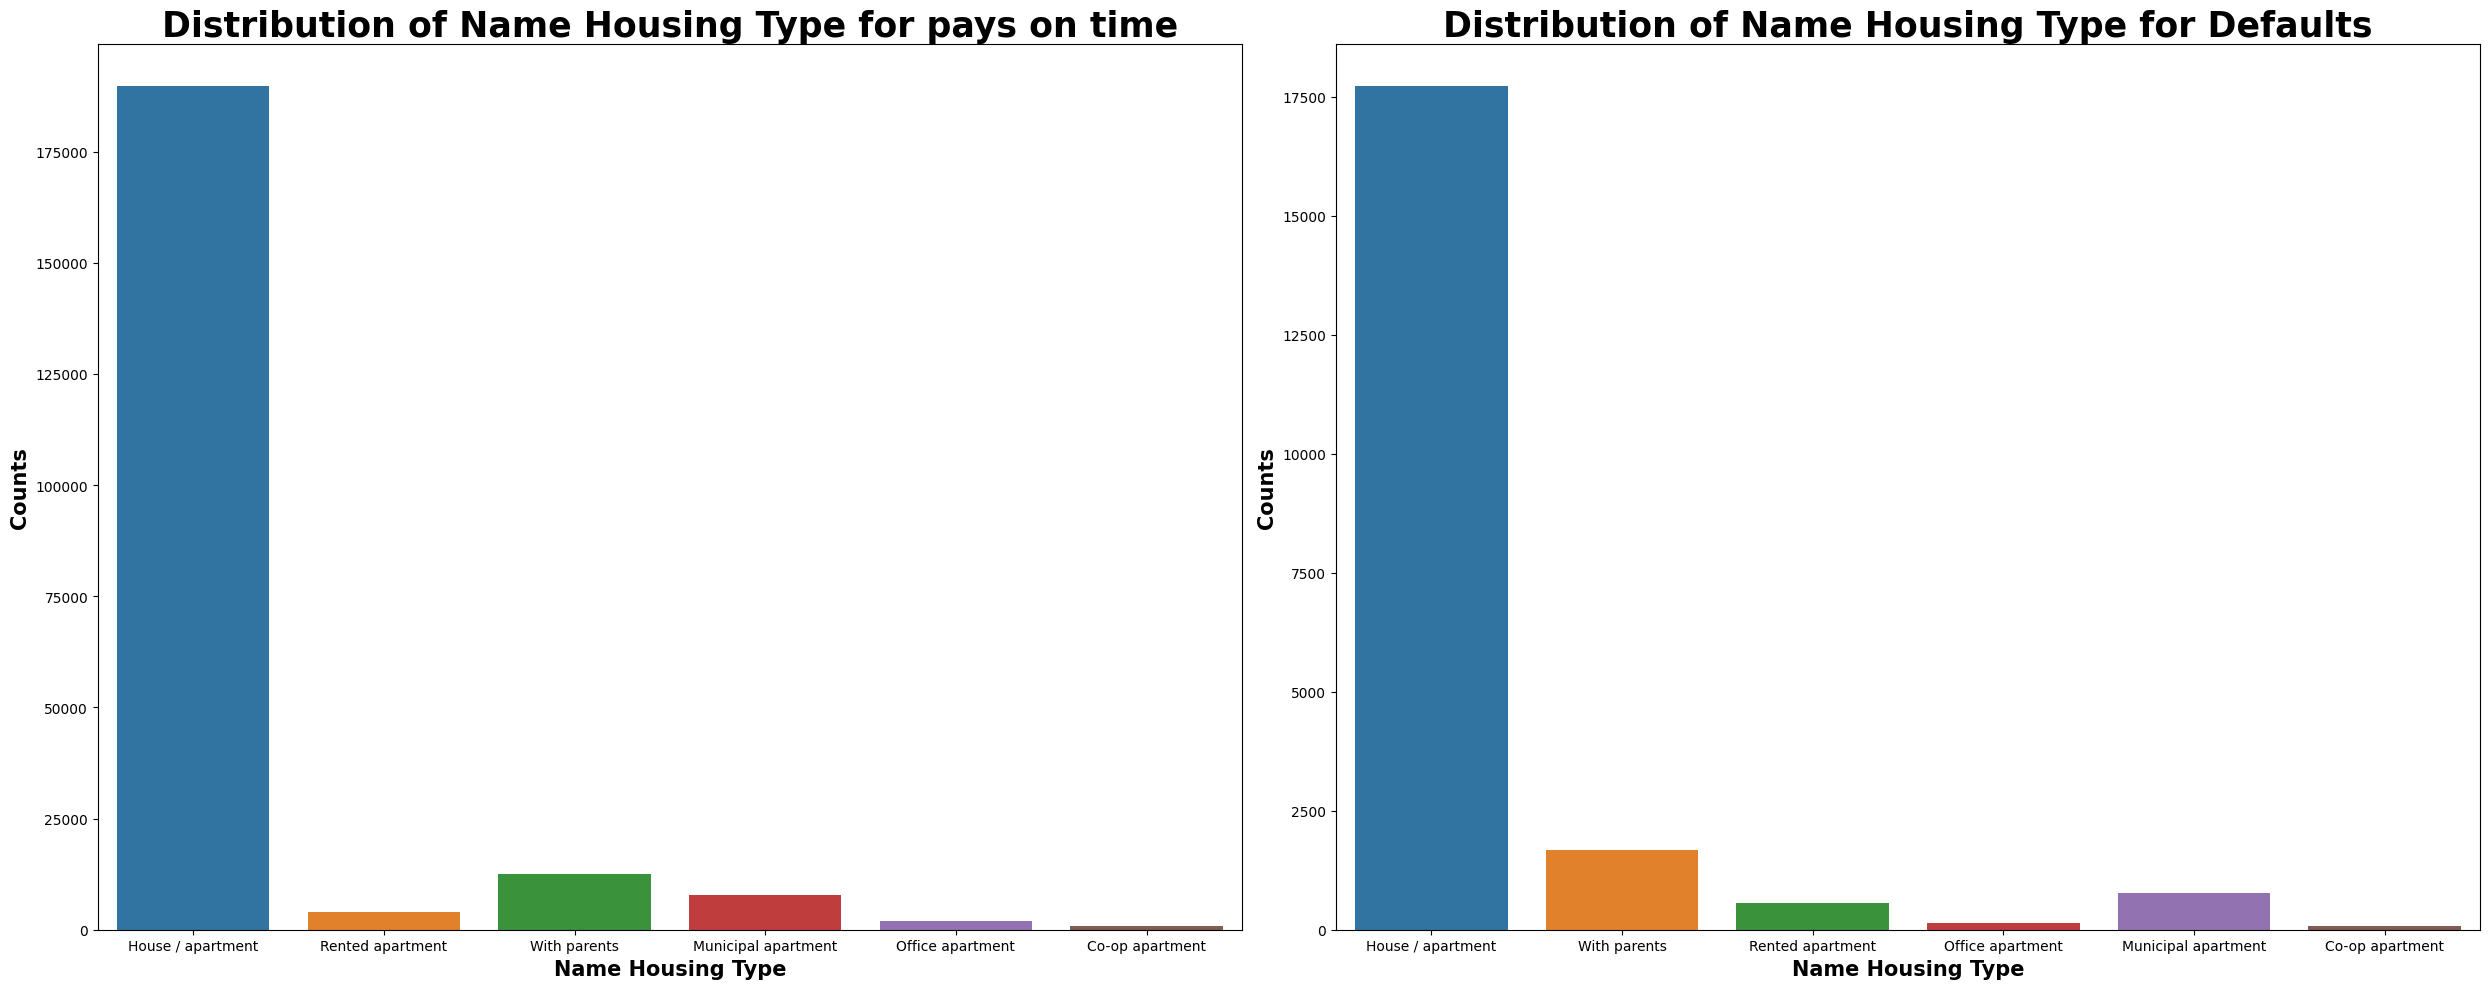

In [112]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
sns.countplot(data=df0,x='NAME_HOUSING_TYPE',ax=ax1)
sns.countplot(data=df1,x='NAME_HOUSING_TYPE',ax=ax2)
ax1.set_title('Distribution of Name Housing Type for pays on time',fontsize=25,fontweight='bold')
ax2.set_title('Distribution of Name Housing Type for Defaults',fontsize=25,fontweight='bold')
ax1.set_xlabel('Name Housing Type',fontsize=15,fontweight='bold')
ax1.set_ylabel('Counts',fontsize=15,fontweight='bold')
ax2.set_xlabel('Name Housing Type',fontsize=15,fontweight='bold')
ax2.set_ylabel('Counts',fontsize=15,fontweight='bold')


plt.tight_layout()

# Distribution for Annuity Amount for Non-Defaulter VS Defaulter

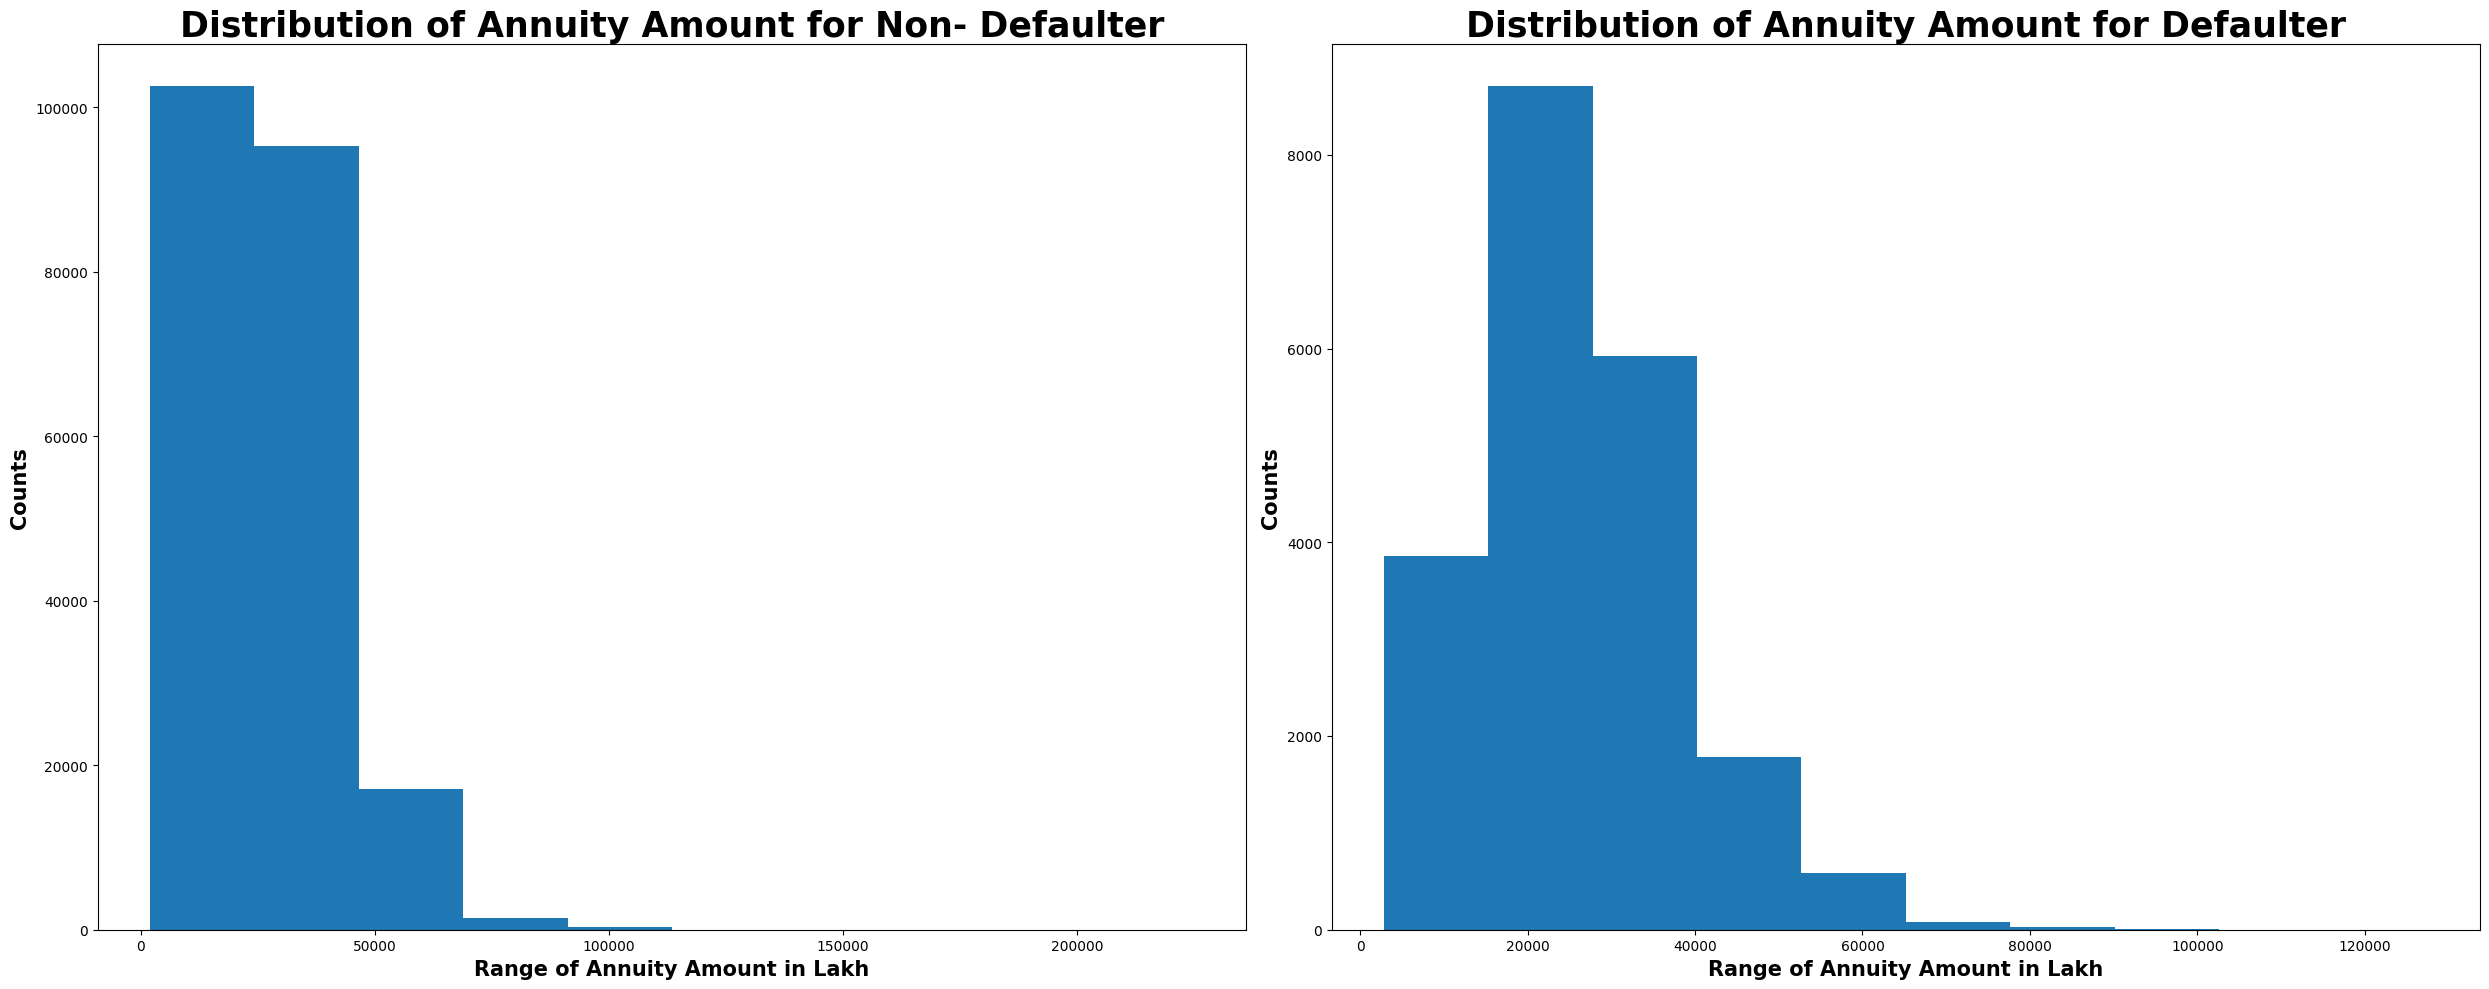

In [113]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
ax1.hist(df0['AMT_ANNUITY'])
ax2.hist(df1['AMT_ANNUITY'])
ax1.set_title('Distribution of Annuity Amount for Non- Defaulter',fontsize=25,fontweight='bold')
ax2.set_title('Distribution of Annuity Amount for Defaulter',fontsize=25,fontweight='bold')
ax1.set_xlabel('Range of Annuity Amount in Lakh',fontsize=15,fontweight='bold')
ax1.set_ylabel('Counts',fontsize=15,fontweight='bold')
ax2.set_xlabel('Range of Annuity Amount in Lakh',fontsize=15,fontweight='bold')
ax2.set_ylabel('Counts',fontsize=15,fontweight='bold')


plt.tight_layout()
plt.show()


# Clients Who Have Own car status for Non-Defaulter VS Defaulter

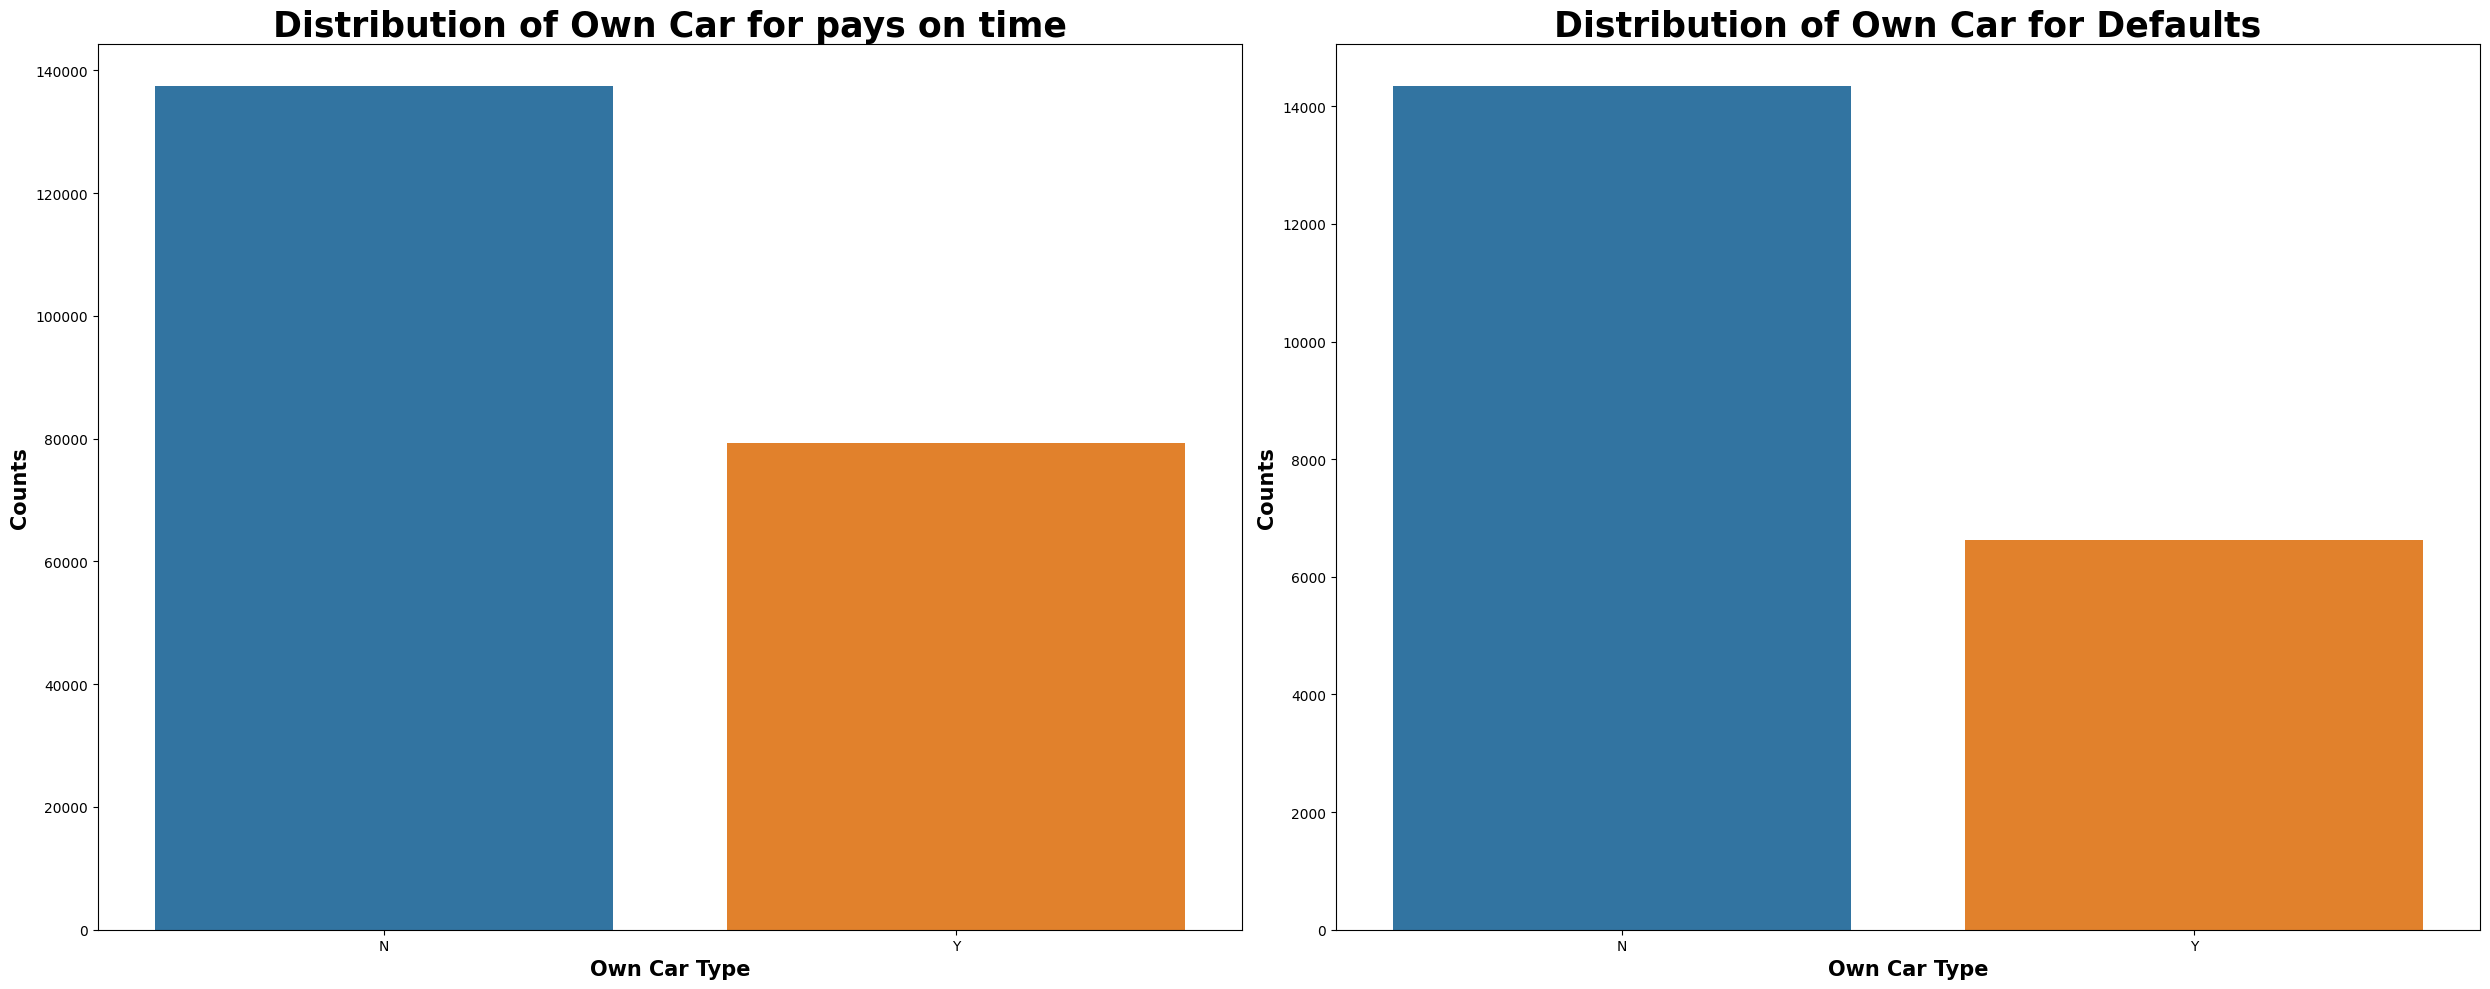

In [114]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
sns.countplot(data=df0,x='FLAG_OWN_CAR',ax=ax1)
sns.countplot(data=df1,x='FLAG_OWN_CAR',ax=ax2)
ax1.set_title('Distribution of Own Car for pays on time',fontsize=25,fontweight='bold')
ax2.set_title('Distribution of Own Car for Defaults',fontsize=25,fontweight='bold')
ax1.set_xlabel('Own Car Type',fontsize=15,fontweight='bold')
ax1.set_ylabel('Counts',fontsize=15,fontweight='bold')
ax2.set_xlabel('Own Car Type',fontsize=15,fontweight='bold')
ax2.set_ylabel('Counts',fontsize=15,fontweight='bold')


plt.tight_layout()

# Dustribution of Family member Number for Non-Defaulter VS Defaulter

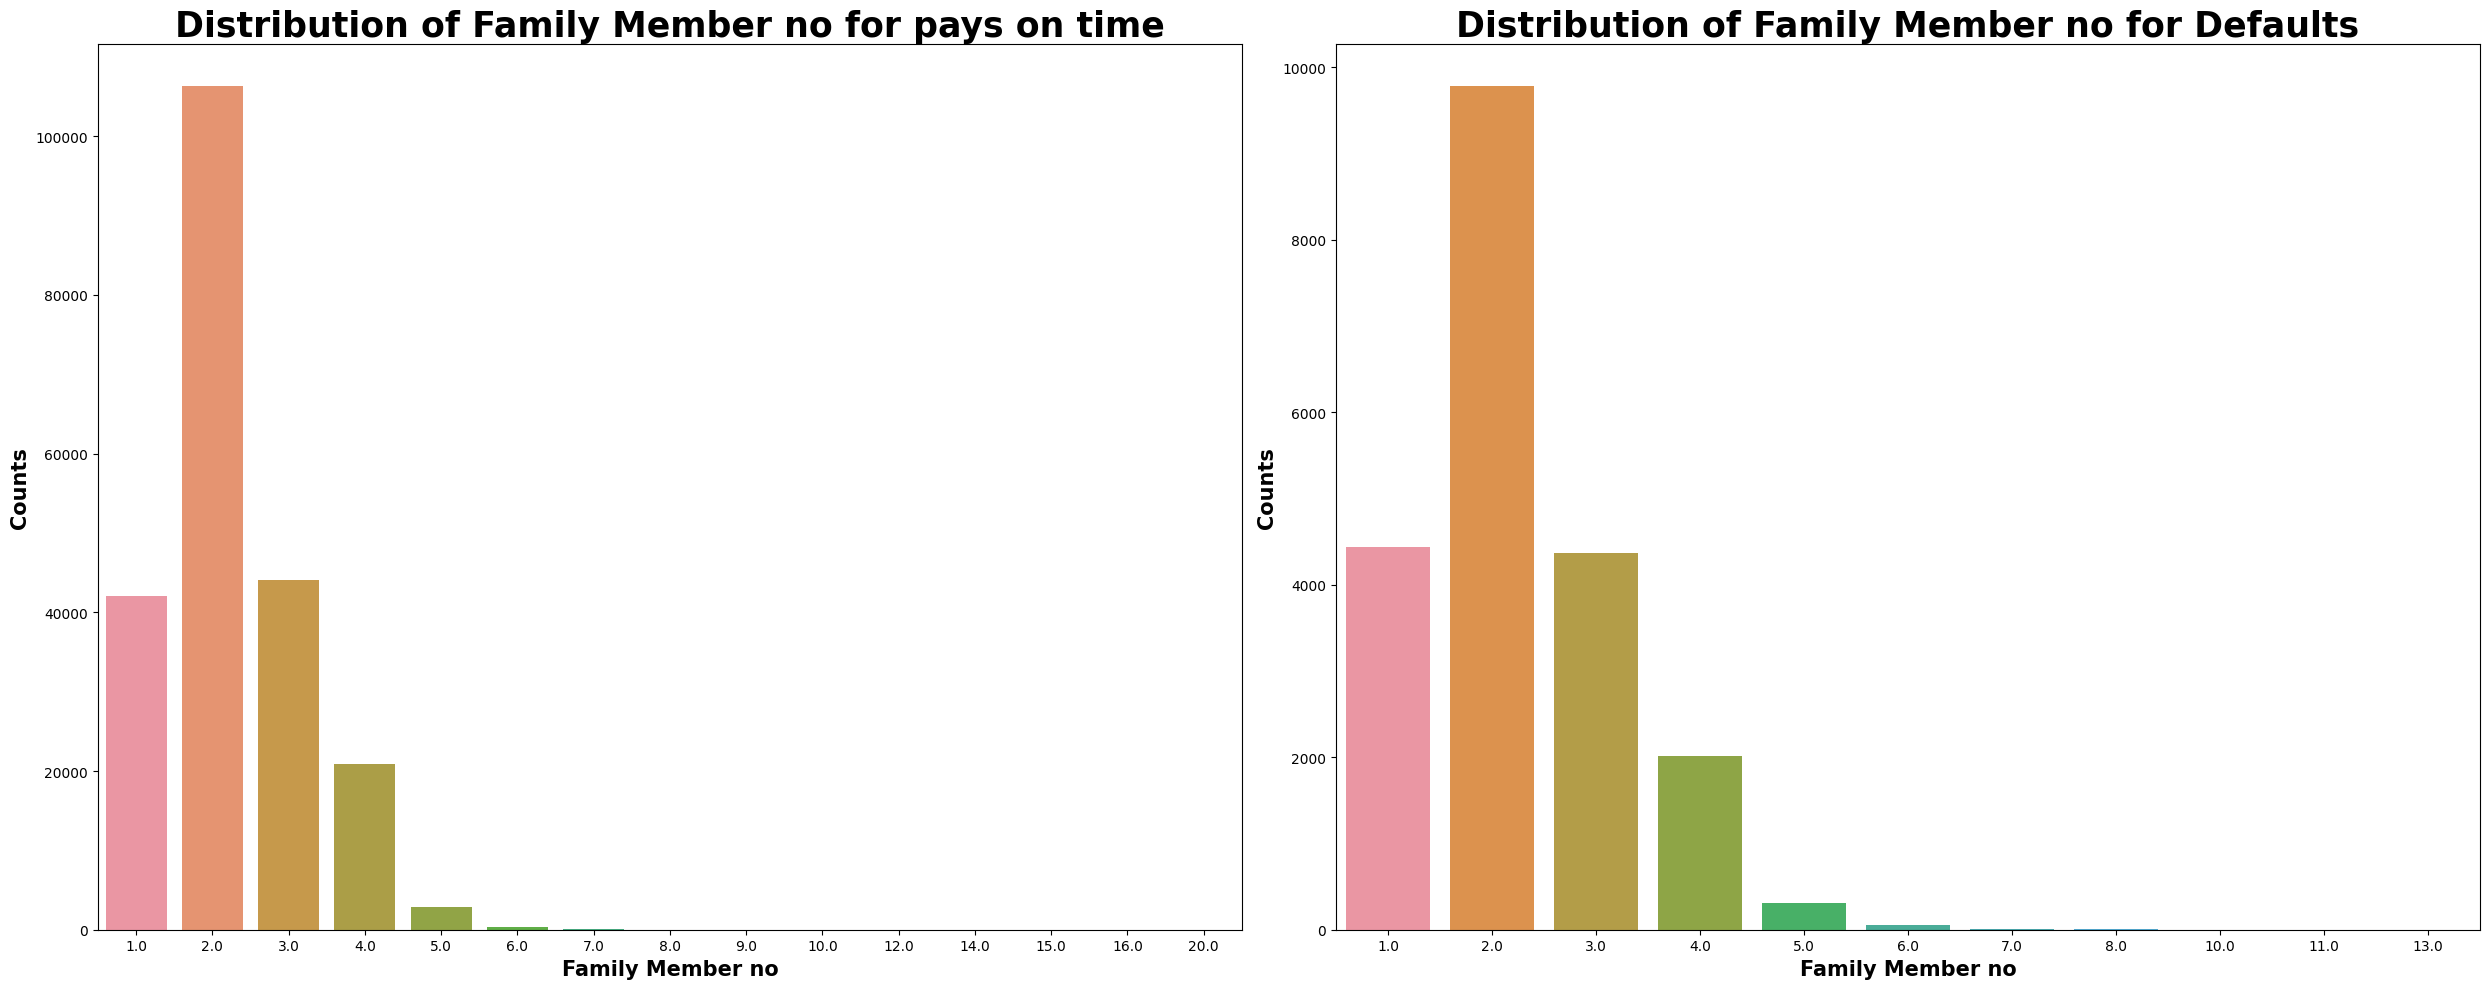

In [115]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
sns.countplot(data=df0,x='CNT_FAM_MEMBERS',ax=ax1)
sns.countplot(data=df1,x='CNT_FAM_MEMBERS',ax=ax2)
ax1.set_title('Distribution of Family Member no for pays on time',fontsize=25,fontweight='bold')
ax2.set_title('Distribution of Family Member no for Defaults',fontsize=25,fontweight='bold')
ax1.set_xlabel('Family Member no',fontsize=15,fontweight='bold')
ax1.set_ylabel('Counts',fontsize=15,fontweight='bold')
ax2.set_xlabel('Family Member no',fontsize=15,fontweight='bold')
ax2.set_ylabel('Counts',fontsize=15,fontweight='bold')


plt.tight_layout()

# Name Suite Type for Non-Defaulter VS Defaulter

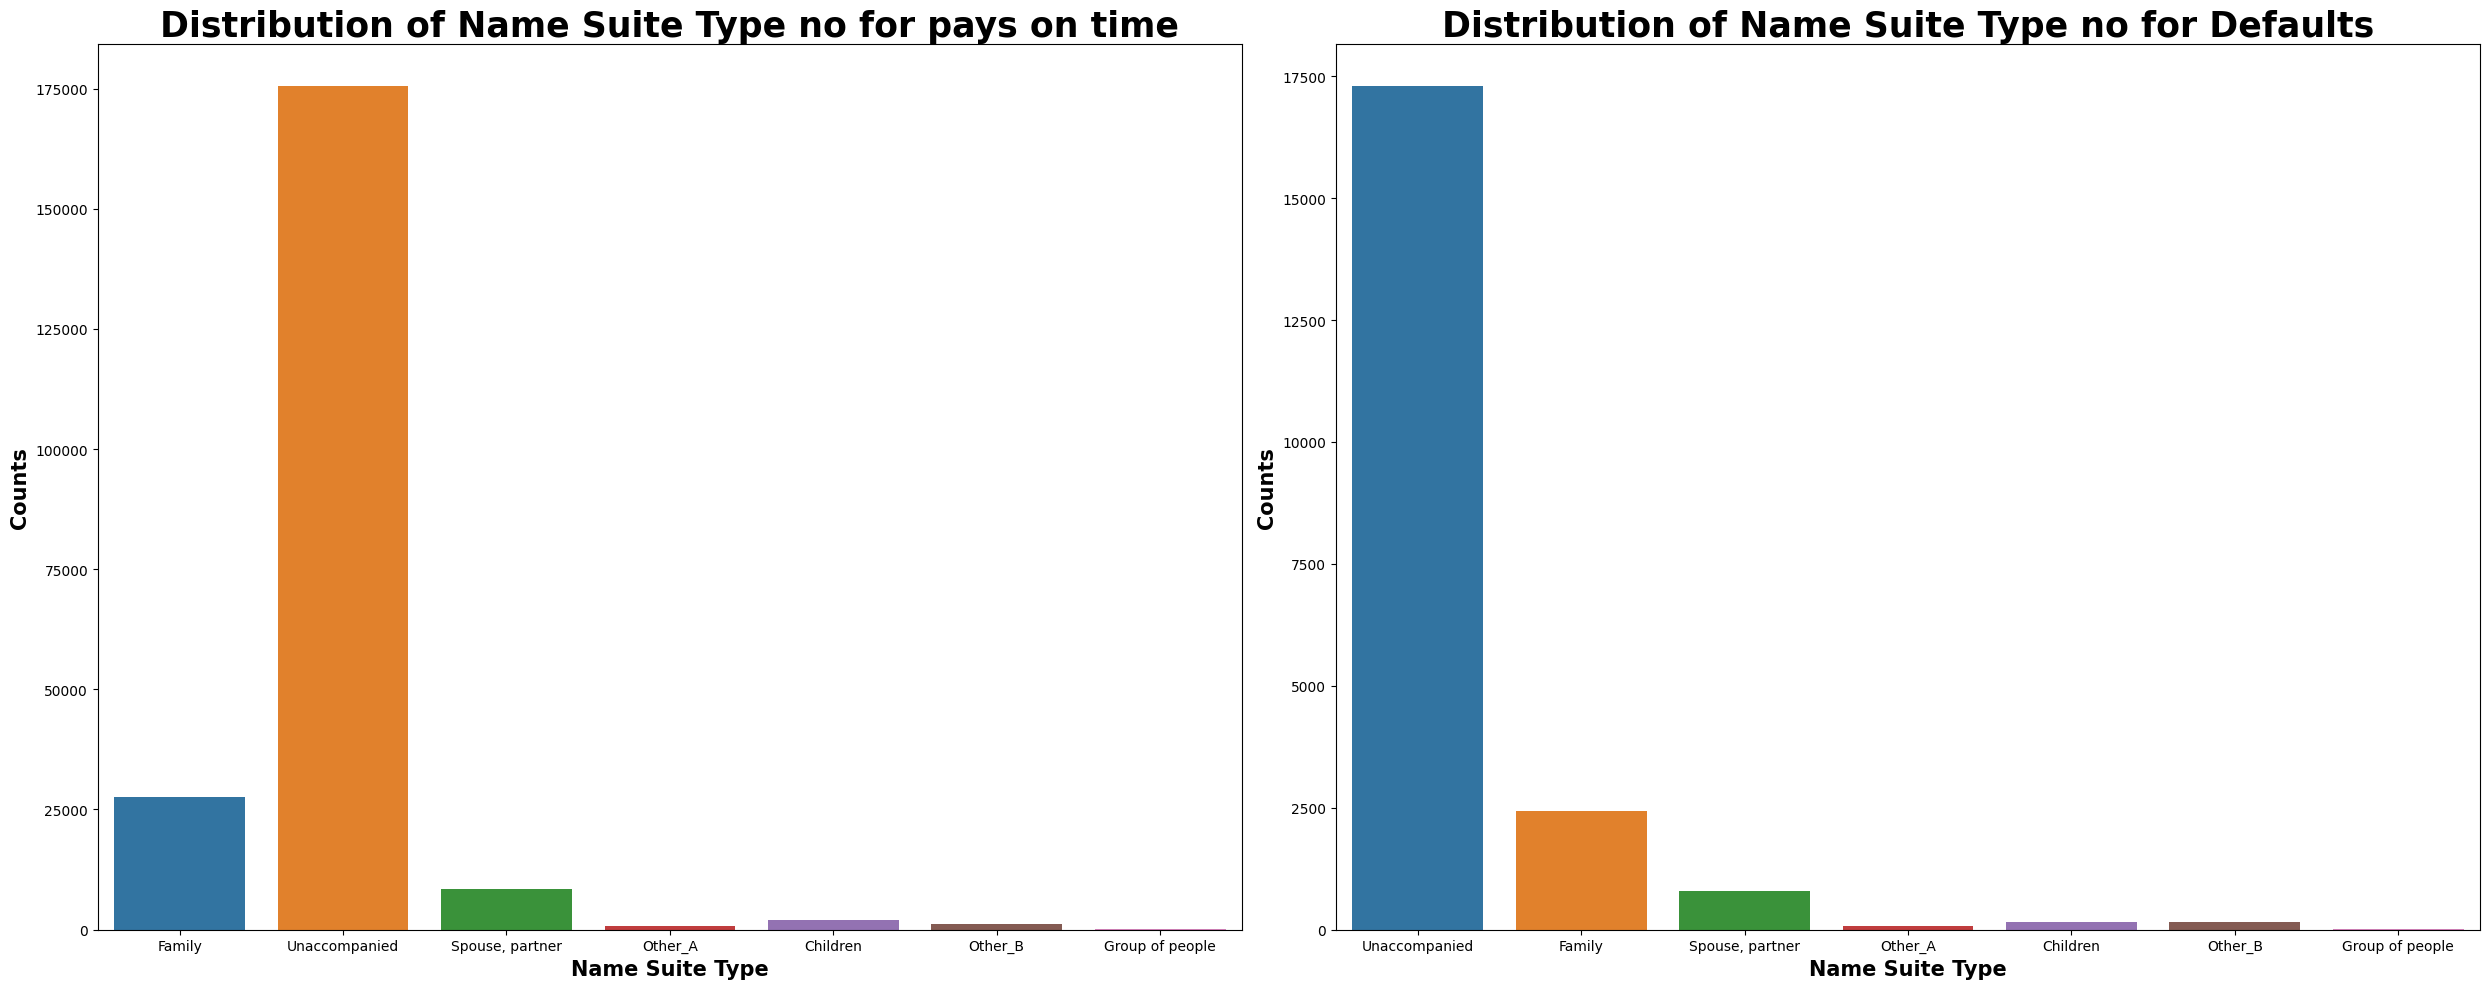

In [116]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
sns.countplot(data=df0,x='NAME_TYPE_SUITE',ax=ax1)
sns.countplot(data=df1,x='NAME_TYPE_SUITE',ax=ax2)
ax1.set_title('Distribution of Name Suite Type no for pays on time',fontsize=25,fontweight='bold')
ax2.set_title('Distribution of Name Suite Type no for Defaults',fontsize=25,fontweight='bold')
ax1.set_xlabel('Name Suite Type',fontsize=15,fontweight='bold')
ax1.set_ylabel('Counts',fontsize=15,fontweight='bold')
ax2.set_xlabel('Name Suite Type',fontsize=15,fontweight='bold')
ax2.set_ylabel('Counts',fontsize=15,fontweight='bold')


plt.tight_layout()

# Marital Status for Non-Defaulter VS Defaulter

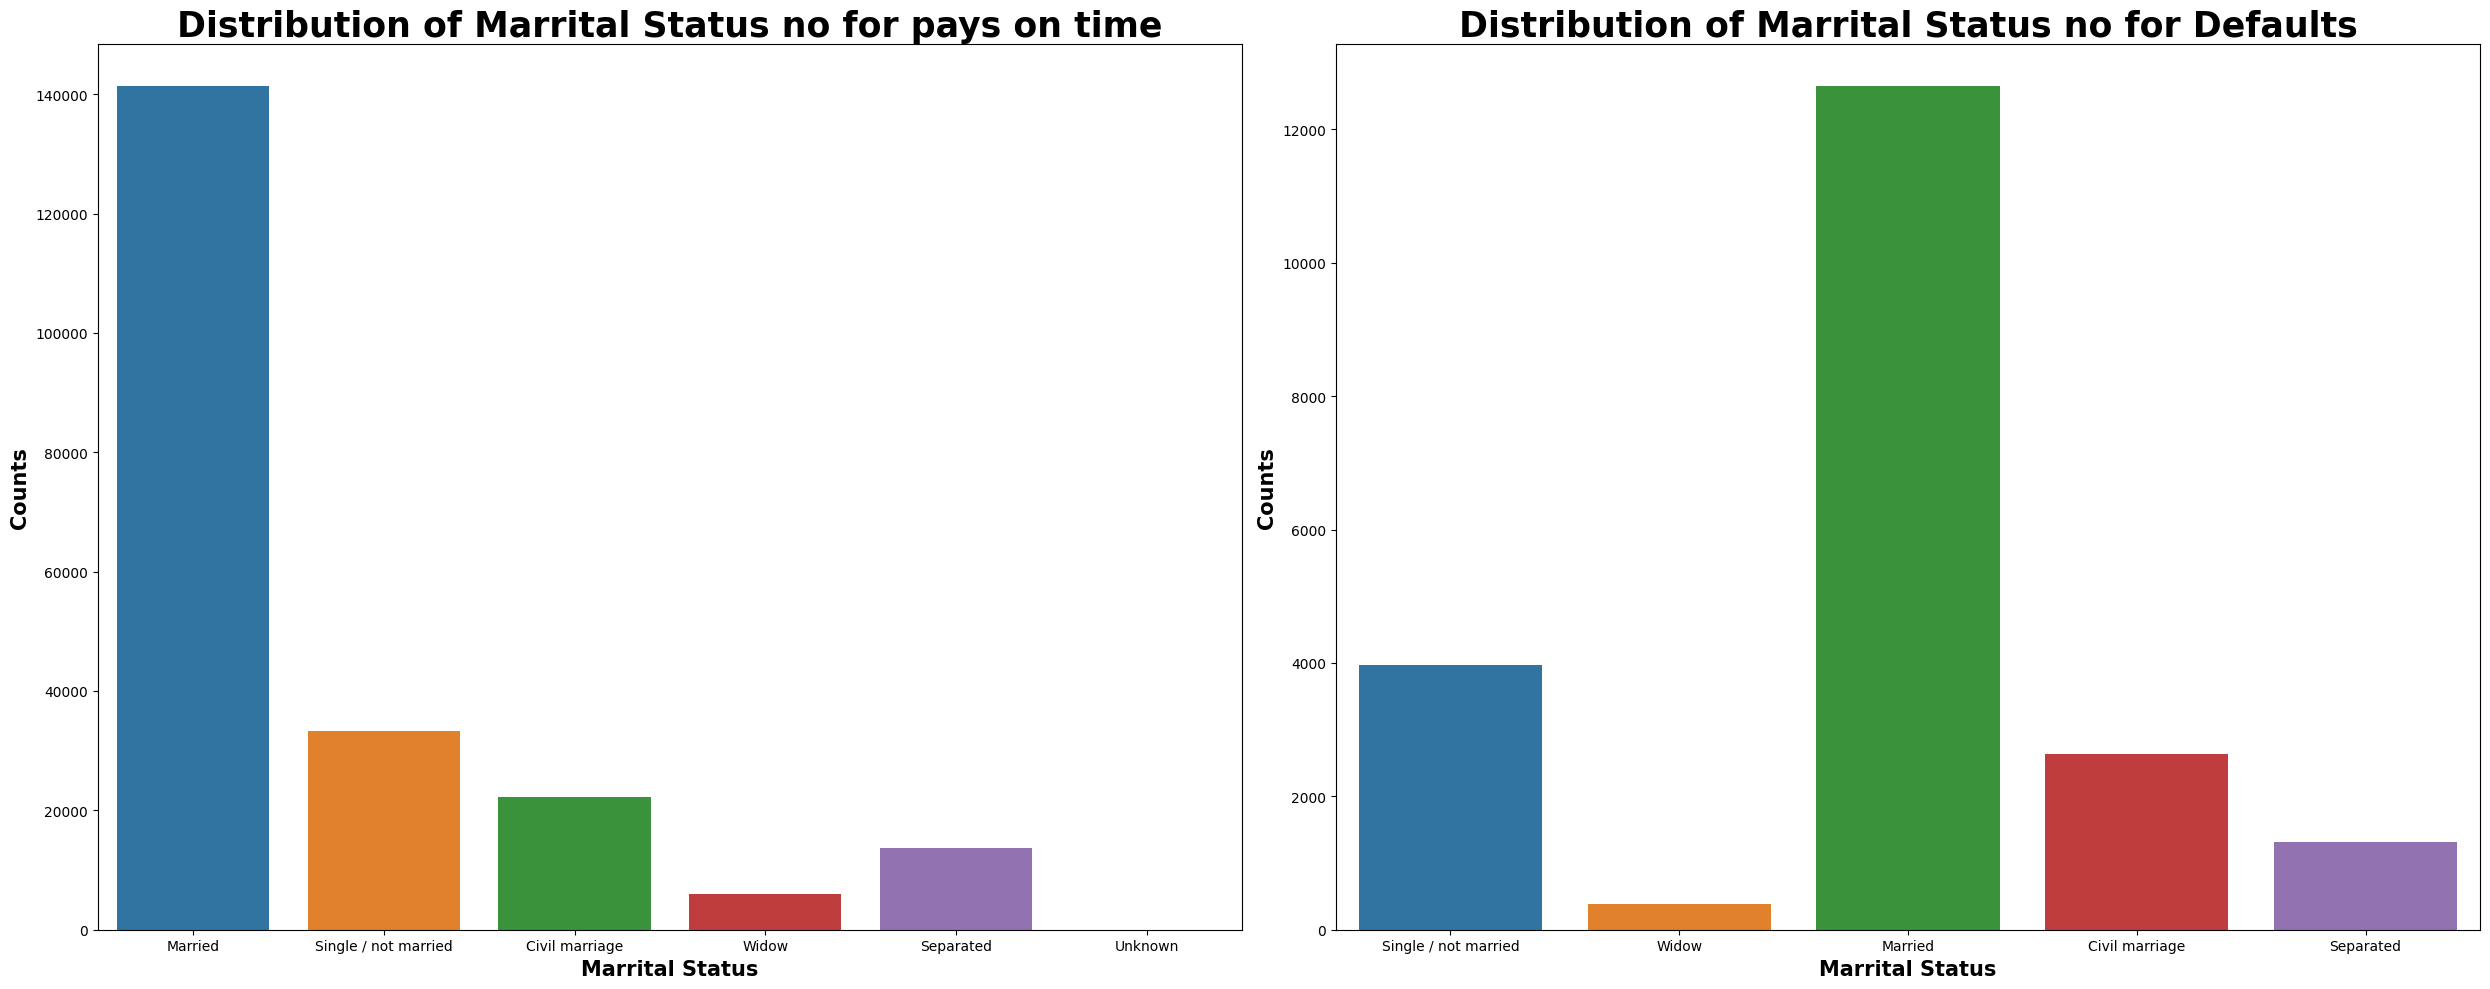

In [117]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
sns.countplot(data=df0,x='NAME_FAMILY_STATUS',ax=ax1)
sns.countplot(data=df1,x='NAME_FAMILY_STATUS',ax=ax2)
ax1.set_title('Distribution of Marrital Status no for pays on time',fontsize=25,fontweight='bold')
ax2.set_title('Distribution of Marrital Status no for Defaults',fontsize=25,fontweight='bold')
ax1.set_xlabel('Marrital Status',fontsize=15,fontweight='bold')
ax1.set_ylabel('Counts',fontsize=15,fontweight='bold')
ax2.set_xlabel('Marrital Status',fontsize=15,fontweight='bold')
ax2.set_ylabel('Counts',fontsize=15,fontweight='bold')


plt.tight_layout()

# Clients Own Housing Status

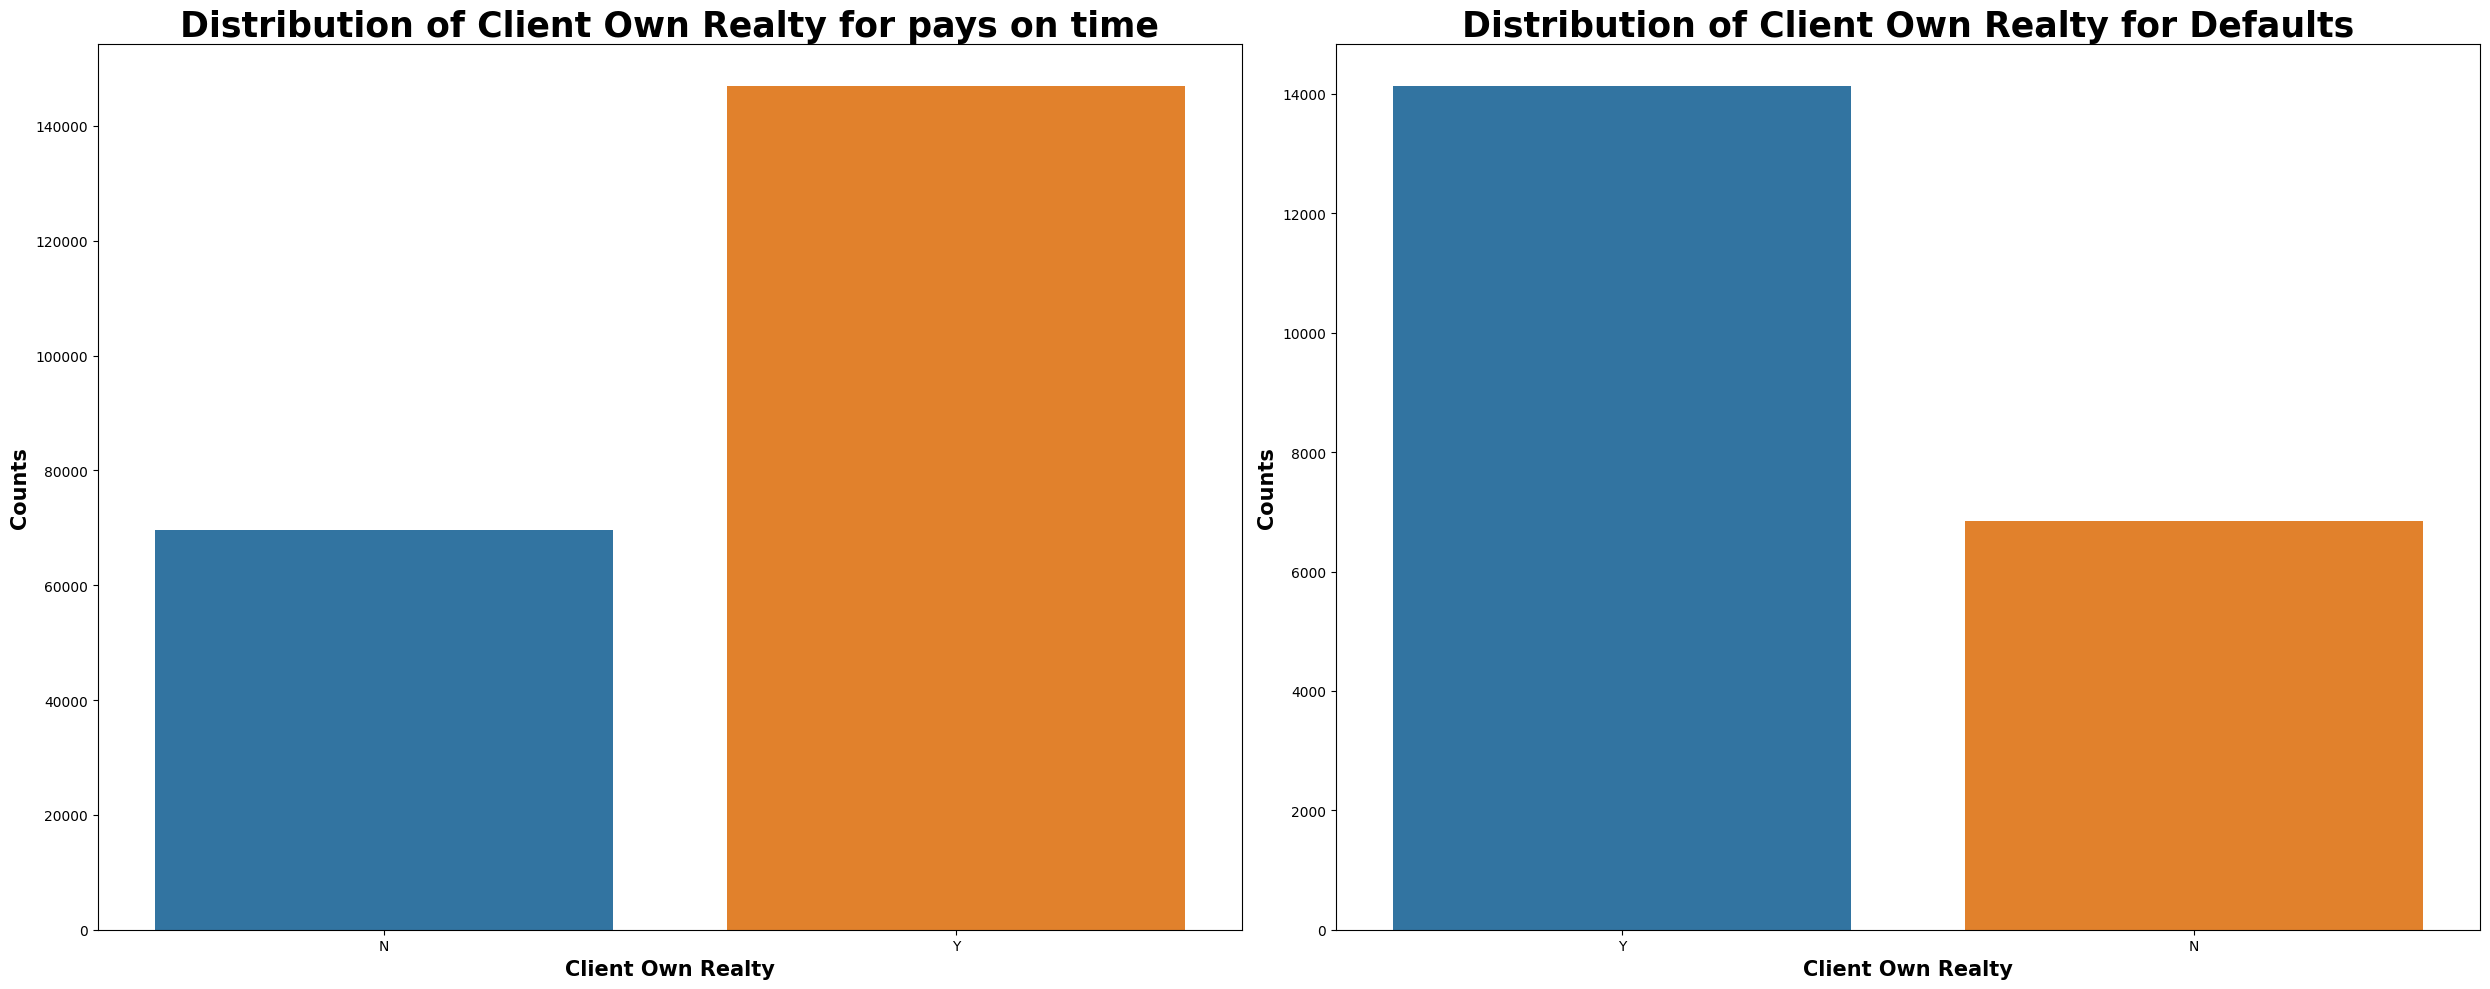

In [118]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
sns.countplot(data=df0,x='FLAG_OWN_REALTY',ax=ax1)
sns.countplot(data=df1,x='FLAG_OWN_REALTY',ax=ax2)
ax1.set_title('Distribution of Client Own Realty for pays on time',fontsize=25,fontweight='bold')
ax2.set_title('Distribution of Client Own Realty for Defaults',fontsize=25,fontweight='bold')
ax1.set_xlabel('Client Own Realty',fontsize=15,fontweight='bold')
ax1.set_ylabel('Counts',fontsize=15,fontweight='bold')
ax2.set_xlabel('Client Own Realty',fontsize=15,fontweight='bold')
ax2.set_ylabel('Counts',fontsize=15,fontweight='bold')


plt.tight_layout()

# Number of Child 

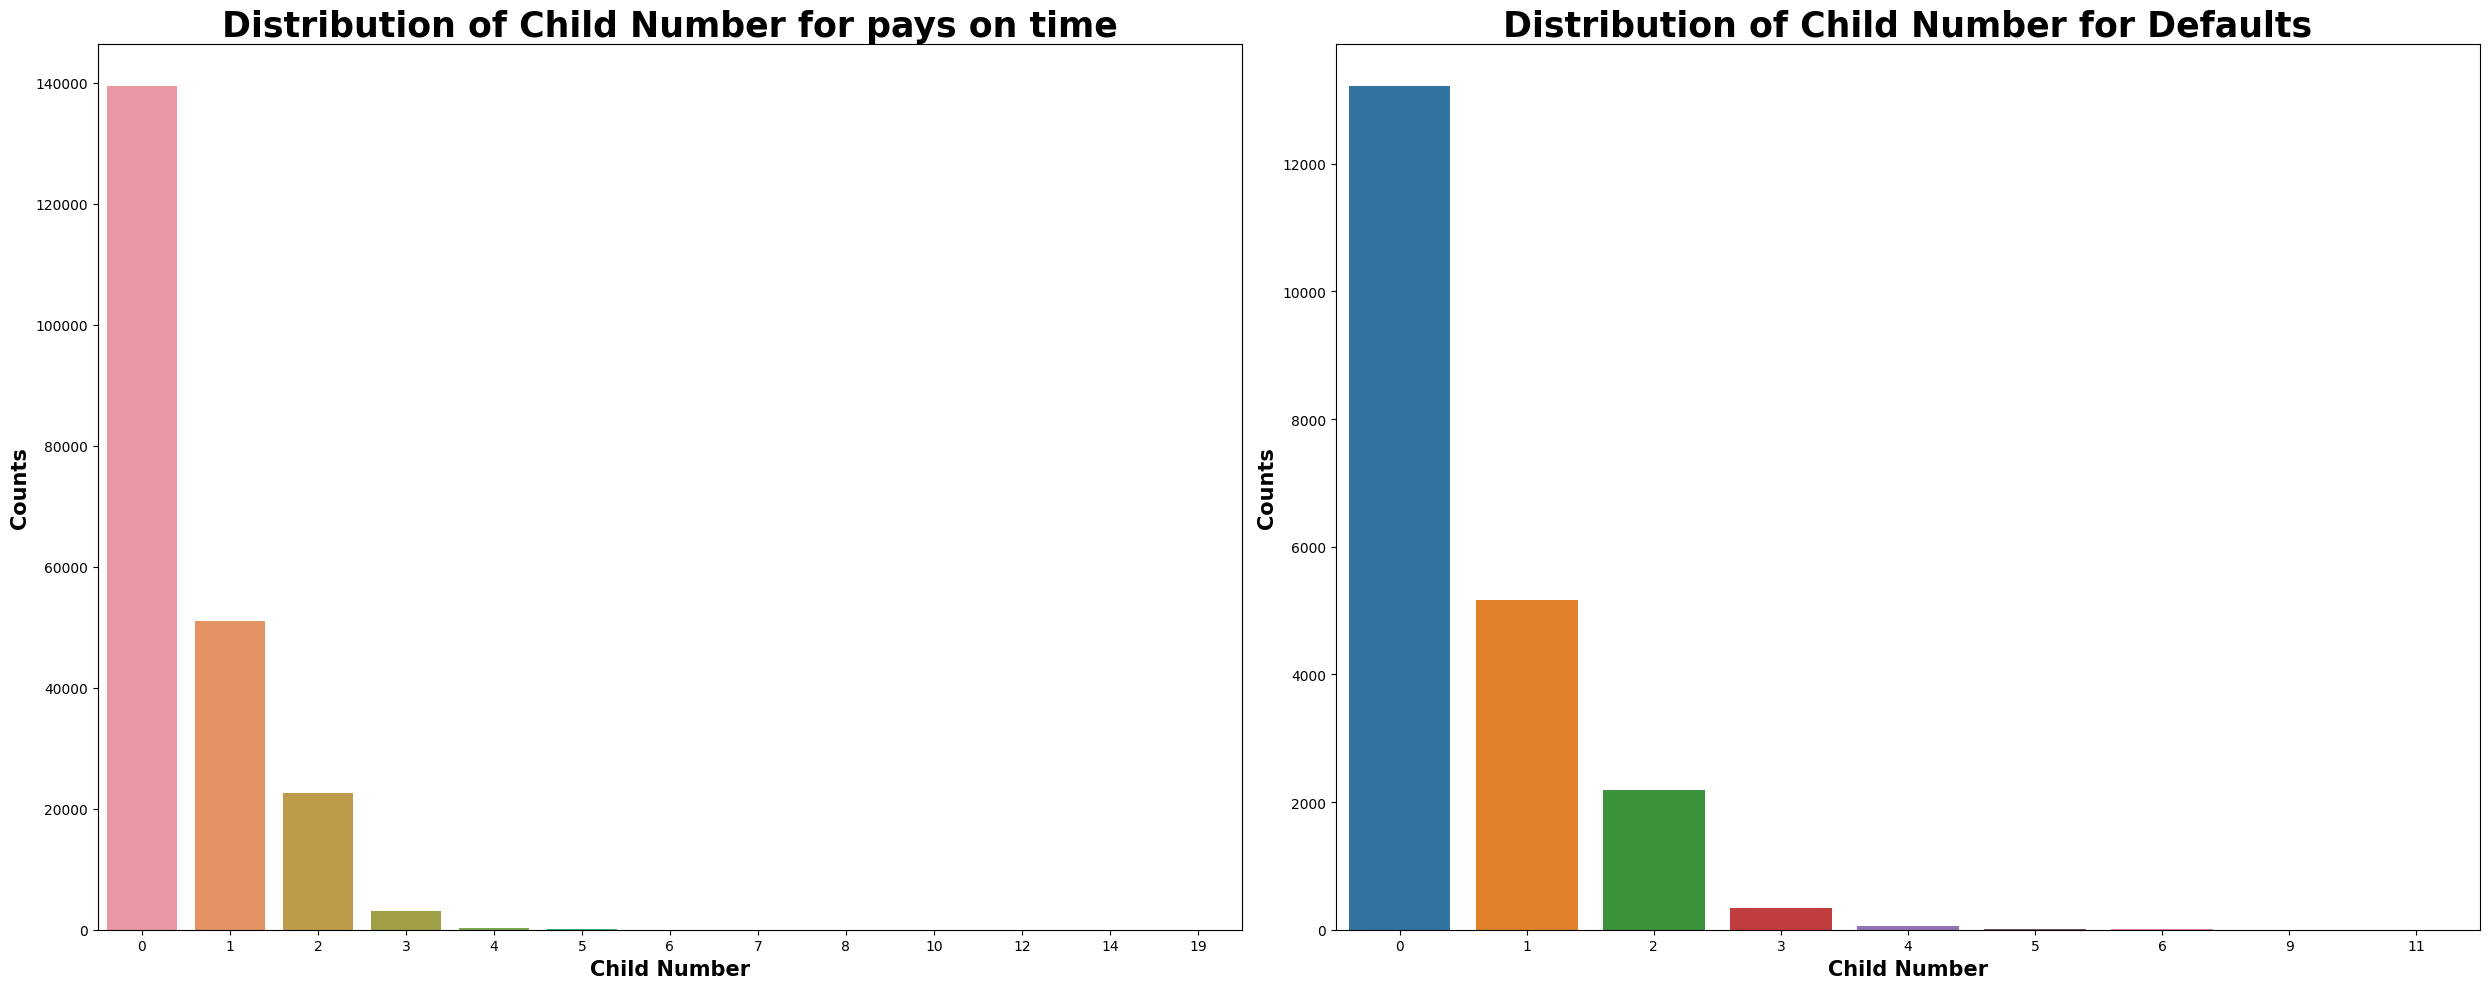

In [119]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
sns.countplot(data=df0,x='CNT_CHILDREN',ax=ax1)
sns.countplot(data=df1,x='CNT_CHILDREN',ax=ax2)
ax1.set_title('Distribution of Child Number for pays on time',fontsize=25,fontweight='bold')
ax2.set_title('Distribution of Child Number for Defaults',fontsize=25,fontweight='bold')
ax1.set_xlabel('Child Number',fontsize=15,fontweight='bold')
ax1.set_ylabel('Counts',fontsize=15,fontweight='bold')
ax2.set_xlabel('Child Number',fontsize=15,fontweight='bold')
ax2.set_ylabel('Counts',fontsize=15,fontweight='bold')


plt.tight_layout()

# Housing Type

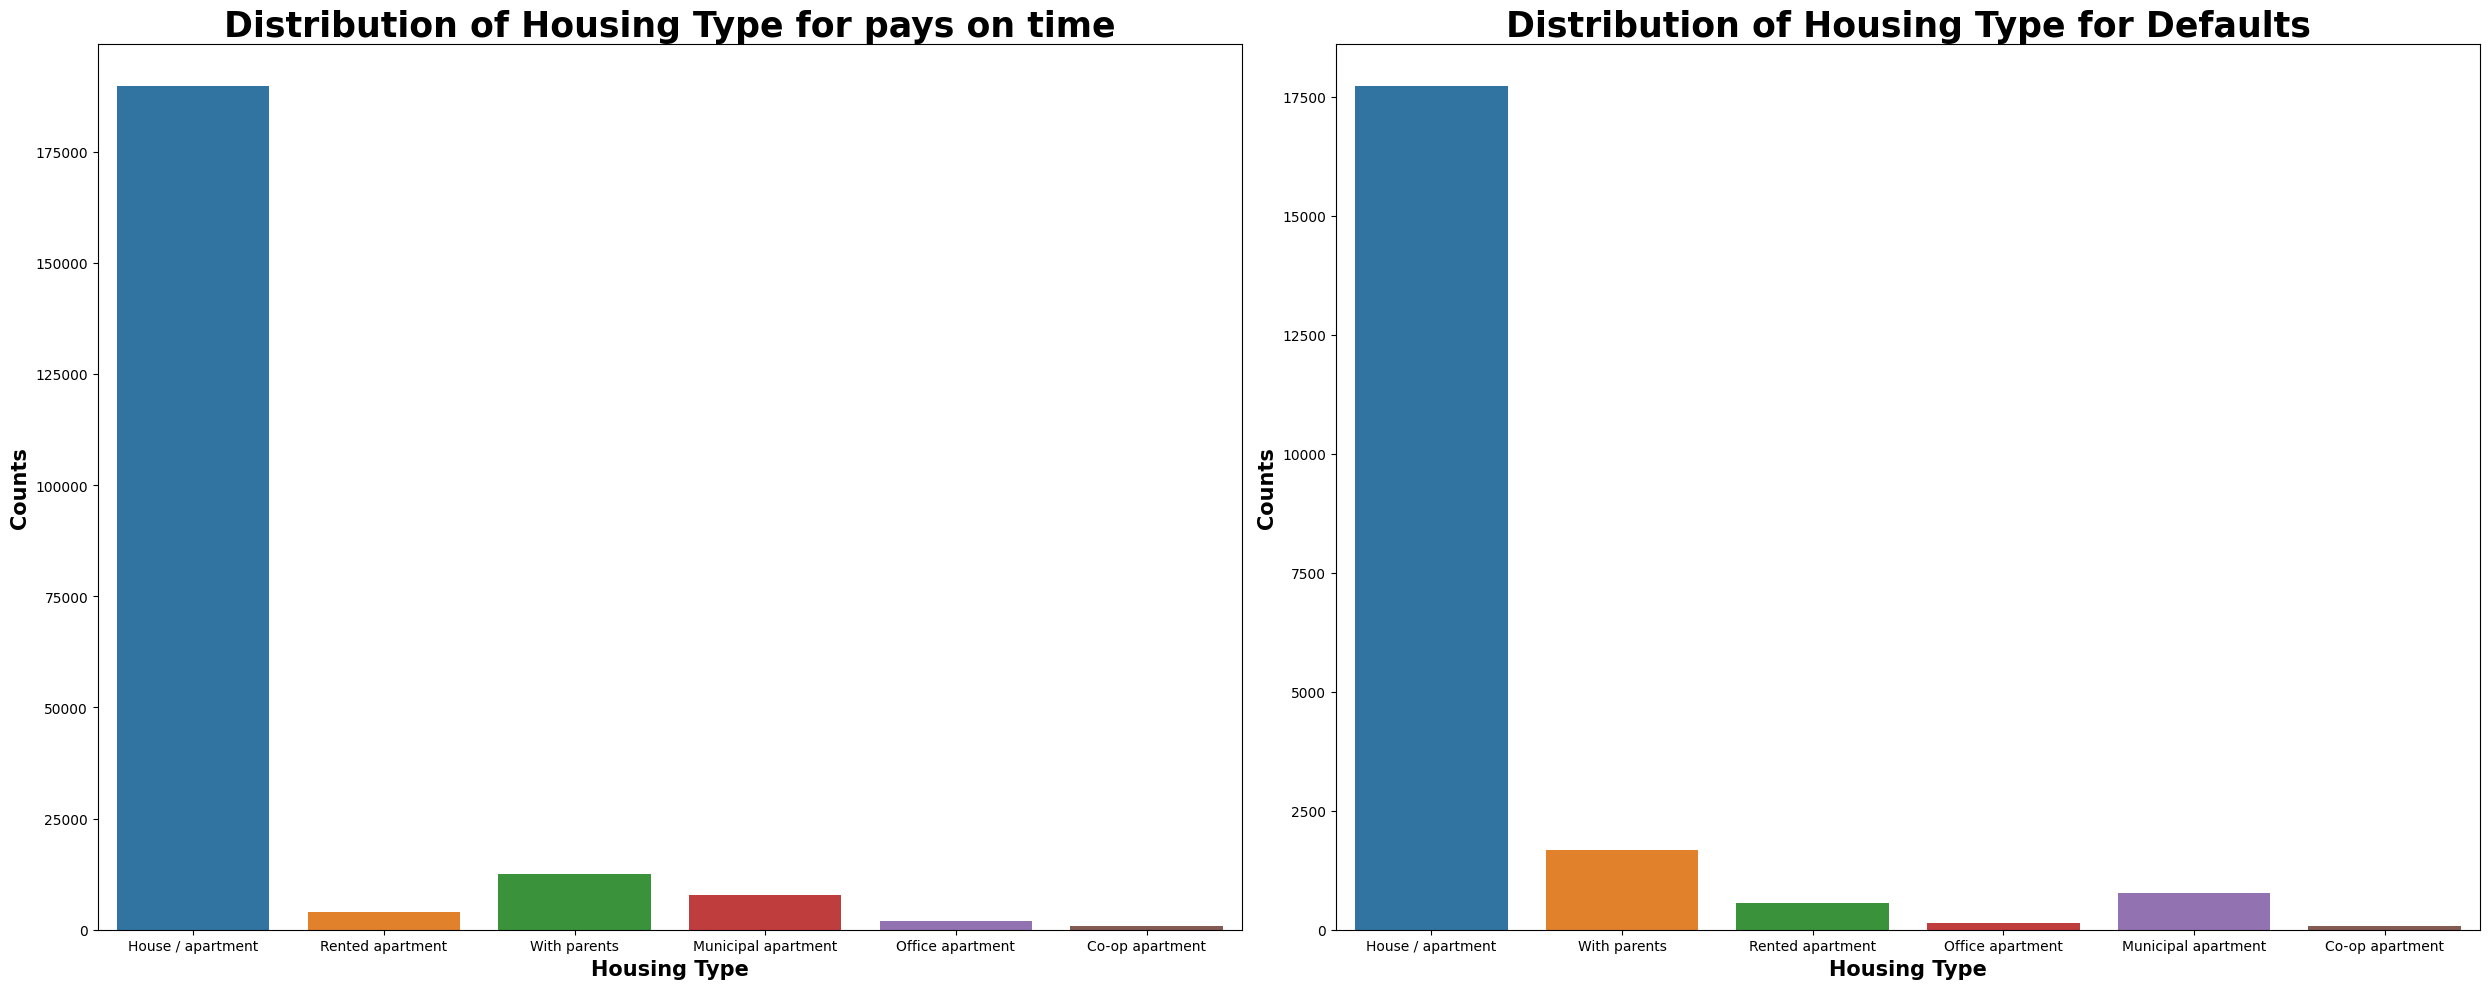

In [120]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

sns.countplot(data=df0,x='NAME_HOUSING_TYPE',ax=ax1)
sns.countplot(data=df1,x='NAME_HOUSING_TYPE',ax=ax2)
ax1.set_title('Distribution of Housing Type for pays on time',fontsize=25,fontweight='bold')
ax2.set_title('Distribution of Housing Type for Defaults',fontsize=25,fontweight='bold')
ax1.set_xlabel('Housing Type',fontsize=15,fontweight='bold')
ax1.set_ylabel('Counts',fontsize=15,fontweight='bold')
ax2.set_xlabel('Housing Type',fontsize=15,fontweight='bold')
ax2.set_ylabel('Counts',fontsize=15,fontweight='bold')


plt.tight_layout()